# 2-BrainStation Flaredown Capstone: Aggregation and Feature Engineering

**Author:** Sarah Gates

**Date:** September 2022

**Contact:** sarahgates2015@u.northwestern.edu

**Notebook:** 2 of 4

**Next Notebook:** 3-Gates_FlaredownCapstone_EDA

* [1. Introduction](#intro-bullet)

* [2. Data Loading and Examination](#first-bullet)

    * [a. Create Dataframe](#first-bullet1)
    * [b. Removing Duplicates](#first-bullet2)

     <br>

    * [c. Data Aggregator and Feature Egineering Function](#third-bullet3)
    * [d. Dataset 1: Fibromyalgia Binary Classification](#third-bullet4)
        * [i. Fibromyalgia Users](#third-bullet4i)
        * [ii. Non-Fibromyalgia Users](#third-bullet4ii)
        * [iii. New Dataset Creation](#third-bullet4iii)
    
    <br>

    * [e. Dataset 2: Autoimmune Multiclass](#third-bullet5)

    

In [1]:
# importing required libraries 
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# importing the scripts for data filtering and aggregation
import sys

sys.path.append("C:\\Users\\sarah\\Documents\\Brainstation\\DataScienceBootcamp\\Capstone\\FlaredownCapstone\\scripts")

from data_aggregator import data_aggregator
from filterer import filterer
from entity_resolver import entity_resolver

In [3]:
df_conds = pd.read_csv('data/conditions.csv')
df_symps = pd.read_csv('data/symptoms.csv')

In [4]:
df_conds.columns

Index(['Unnamed: 0', 'ids', 'user_id', 'age', 'sex', 'country', 'checkin_date',
       'trackable_id', 'trackable_type', 'trackable_name', 'trackable_value',
       'year', 'month'],
      dtype='object')

In [5]:
df_conds.drop(columns='Unnamed: 0', inplace=True)
df_symps.drop(columns='Unnamed: 0', inplace=True)

In [6]:
df_conds.head(5)

,ids,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month
0,3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,34.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,2017,4
1,3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,34.0,female,CA,2017-04-28,3170,Condition,hand pain,4,2017,4
2,3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,34.0,female,CA,2017-04-28,3171,Condition,numbness in right hand,2,2017,4
3,3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,34.0,female,CA,2017-04-28,3172,Condition,pain in left ankle,1,2017,4
4,3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,34.0,female,CA,2017-04-28,3173,Condition,pain in left leg,1,2017,4


In [7]:
df_symps.head(5)

,ids,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month
0,3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,34.0,female,CA,2017-04-28,123,Symptom,stiffness,3,2017,4
1,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-17,245,Symptom,mania,0,2015,7
2,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-17,246,Symptom,intrusive thoughts,0,2015,7
3,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-17,197,Symptom,stomach cramps,2,2015,7
4,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-17,247,Symptom,ovarian pain,0,2015,7


**Checking Data**

In [8]:
df_conds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014157 entries, 0 to 1014156
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   ids              1014157 non-null  int64  
 1   user_id          1014157 non-null  object 
 2   age              1014157 non-null  float64
 3   sex              1014157 non-null  object 
 4   country          1014157 non-null  object 
 5   checkin_date     1014157 non-null  object 
 6   trackable_id     1014157 non-null  int64  
 7   trackable_type   1014157 non-null  object 
 8   trackable_name   1014157 non-null  object 
 9   trackable_value  1014157 non-null  int64  
 10  year             1014157 non-null  int64  
 11  month            1014157 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 92.8+ MB


In [9]:
df_symps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242194 entries, 0 to 3242193
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   ids              int64  
 1   user_id          object 
 2   age              float64
 3   sex              object 
 4   country          object 
 5   checkin_date     object 
 6   trackable_id     int64  
 7   trackable_type   object 
 8   trackable_name   object 
 9   trackable_value  int64  
 10  year             int64  
 11  month            int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 296.8+ MB


In [10]:
df_symps.isnull().sum()

ids                0
user_id            0
age                0
sex                0
country            0
checkin_date       0
trackable_id       0
trackable_type     0
trackable_name     0
trackable_value    0
year               0
month              0
dtype: int64

In [11]:
df_conds.duplicated().sum()

0

In [12]:
df_symps.duplicated().sum()

0

## Fibromyalgia Binary Classifcation Dataset

#### Unique Conditions for Fibro Users

**What is Fibromyalgia?**

Fibromyalgia (fi·bro·my·al·gi·a) is a condition that causes pain all over the body (also referred to as widespread pain), sleep problems, fatigue, and often emotional and mental distress. People with fibromyalgia may be more sensitive to pain than people without fibromyalgia. This is called abnormal pain perception processing. Fibromyalgia affects about 4 million US adults, about 2% of the adult population. The cause of fibromyalgia is not known, but it can be effectively treated and managed.

**Signs and Symptoms**

The most common symptoms of fibromyalgia are:

* Pain and stiffness all over the body
* Fatigue and tiredness
* Depression and anxiety
* Sleep problems
* Problems with thinking, memory, and concentration
* Headaches, including migraines

Other symptoms may include:

* Tingling or numbness in hands and feet
* Pain in the face or jaw, including disorders of the jaw known as temporomandibular joint syndrome (also known as TMJ)
* Digestive problems, such as abdominal pain, bloating, constipation, and even irritable bowel syndrome (also known as IBS) 

**Risk Factors**

* Age. Fibromyalgia can affect people of all ages, including children. However, most people are diagnosed during middle age and you are more likely to have fibromyalgia as you get older.
* Lupus or Rheumatoid Arthritis. If you have lupus or rheumatoid arthritis (RA), you are more likely to develop fibromyalgia.
* Sex. Women are twice as likely to have fibromyalgia as men.  
* Stressful or traumatic events, such as car accidents, post-traumatic stress disorder (PTSD)
* Repetitive injuries. Injury from repetitive stress on a joint, such as frequent knee bending.
* Illness (such as viral infections)
* Family history
* Obesity

FROM: https://www.cdc.gov/arthritis/basics/fibromyalgia.htm

Fibromyalgia and chronic fatigue syndrome (CFS) are both illnesses characterized by extreme amounts of fatigue. In fact, the conditions seem to be so intertwined that the medical community continues to debate whether fibromyalgia fatigue is simply a different expression of the same disorder that causes CFS.

FROM: https://www.everydayhealth.com/fibromyalgia/fibromyalgia-and-chronic-fatigue-syndrome.aspx

**COMORBIDITIES**

Patients with fibromyalgia displayed high lifetime rates of migraine, irritable bowel syndrome, chronic fatigue syndrome, major depression, and panic disorder. 

https://pubmed.ncbi.nlm.nih.gov/1558082/

I will create a data frame of users with fibromyalgia. First, I'll create a list of the ids of users with fibro:

In [13]:
fibro_ids = list(df_conds[df_conds['trackable_name'] == 'fibromyalgia'].ids.unique())

len(fibro_ids)

7190

Then I will create a new datafrom from the conditions of those users in the fibro_ids list:

In [14]:
df_fibro = df_conds[df_conds.ids.isin(fibro_ids)].copy()

df_fibro

,ids,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month
40,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,616,Condition,lyme disease,2,2015,5
41,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,397,Condition,fibromyalgia,2,2015,5
42,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,1132,Condition,postural orthostatic tachycardia syndrome,3,2015,5
43,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,350,Condition,ehlers-danlos syndrome,1,2015,5
49,17,QEVuQwEAT556zzFRIWMYQwW/SuVuQg==,33.0,female,US,2015-12-08,397,Condition,fibromyalgia,1,2015,12
...,...,...,...,...,...,...,...,...,...,...,...,...
1014151,42276,QEVuQwEApxEBH8fQ/QfbwDfPFKPuQA==,21.0,female,US,2018-06-06,8,Condition,anxiety,2,2018,6
1014152,42276,QEVuQwEApxEBH8fQ/QfbwDfPFKPuQA==,21.0,female,US,2018-06-07,8,Condition,anxiety,2,2018,6
1014153,42276,QEVuQwEApxEBH8fQ/QfbwDfPFKPuQA==,21.0,female,US,2018-06-08,8,Condition,anxiety,2,2018,6
1014154,42276,QEVuQwEApxEBH8fQ/QfbwDfPFKPuQA==,21.0,female,US,2018-06-09,8,Condition,anxiety,1,2018,6


Here I examine the top 20 conditions (by proportion of users) for fibro users. The idea will be to only keep the most commonly occuring conditions. I have chosen 20 as this includes known comorbidities (RA, lupus, migraines, depression and anxiety)

In [15]:
comorbidities = dict(((df_fibro.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(18) / len(list(df_fibro.ids.unique())))*100).round(2))

comorbidities

{'fibromyalgia': 100.0,
 'depression': 34.19,
 'anxiety': 33.52,
 'irritable bowel syndrome': 20.38,
 'chronic fatigue syndrome': 16.94,
 'insomnia': 13.62,
 'post-traumatic stress disorder': 6.87,
 'postural orthostatic tachycardia syndrome': 6.69,
 'ehlers-danlos syndrome': 6.38,
 'asthma': 6.33,
 'endometriosis': 5.88,
 'lupus': 5.67,
 'rheumatoid arthritis': 5.22,
 'generalized anxiety disorder': 4.95,
 'arthritis': 3.7,
 'osteoarthritis': 3.55,
 'polycystic ovary syndrome (pcos)': 3.27,
 'gerd': 3.25}

In [16]:
# Turning this into a list, dropping fibromyalgia
comorb_list = list(comorbidities.keys())

In [17]:
comorb_list

['fibromyalgia',
 'depression',
 'anxiety',
 'irritable bowel syndrome',
 'chronic fatigue syndrome',
 'insomnia',
 'post-traumatic stress disorder',
 'postural orthostatic tachycardia syndrome',
 'ehlers-danlos syndrome',
 'asthma',
 'endometriosis',
 'lupus',
 'rheumatoid arthritis',
 'generalized anxiety disorder',
 'arthritis',
 'osteoarthritis',
 'polycystic ovary syndrome (pcos)',
 'gerd']

In [18]:
# Adding in a tag for fibromyalgia
df_fibro['target'] = 1

df_fibro.head(5)

,ids,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month,target
40,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,616,Condition,lyme disease,2,2015,5,1
41,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,397,Condition,fibromyalgia,2,2015,5,1
42,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,1132,Condition,postural orthostatic tachycardia syndrome,3,2015,5,1
43,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,350,Condition,ehlers-danlos syndrome,1,2015,5,1
49,17,QEVuQwEAT556zzFRIWMYQwW/SuVuQg==,33.0,female,US,2015-12-08,397,Condition,fibromyalgia,1,2015,12,1


What conditions DONT fibro users have?

In [19]:
df_conds.ids.nunique()

30054

In [20]:
df_not_fibro = df_conds[~df_conds.ids.isin(fibro_ids)].copy()

df_not_fibro.ids.nunique()

22864

In [21]:
df_not_fibro['target'] = 0

In [22]:
df_not_fibro.head(5)

,ids,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month,target
0,3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,34.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,2017,4,0
1,3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,34.0,female,CA,2017-04-28,3170,Condition,hand pain,4,2017,4,0
2,3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,34.0,female,CA,2017-04-28,3171,Condition,numbness in right hand,2,2017,4,0
3,3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,34.0,female,CA,2017-04-28,3172,Condition,pain in left ankle,1,2017,4,0
4,3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,34.0,female,CA,2017-04-28,3173,Condition,pain in left leg,1,2017,4,0


In [23]:
(df_not_fibro.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(25) /  ((df_not_fibro.ids.nunique()))*100) #most of the conditions are the same as FIBRO, DO THESE PEEPS HAVE FIBRO??

trackable_name
anxiety                                      25.730406
depression                                   23.482330
irritable bowel syndrome                      8.974808
postural orthostatic tachycardia syndrome     8.183170
insomnia                                      8.139433
chronic fatigue syndrome                      7.859517
ehlers-danlos syndrome                        7.605843
endometriosis                                 7.177222
lupus                                         4.867915
asthma                                        4.369314
post-traumatic stress disorder                3.219034
generalized anxiety disorder                  3.184045
rheumatoid arthritis                          3.105318
crohn's disease                               2.912876
gastroparesis                                 2.519244
ulcerative colitis                            2.418649
hypothyroidism                                2.291812
allergies                                     2.22

In [24]:
(df_not_fibro.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(13) /  ((df_not_fibro.ids.nunique()))*100)



trackable_name
anxiety                                      25.730406
depression                                   23.482330
irritable bowel syndrome                      8.974808
postural orthostatic tachycardia syndrome     8.183170
insomnia                                      8.139433
chronic fatigue syndrome                      7.859517
ehlers-danlos syndrome                        7.605843
endometriosis                                 7.177222
lupus                                         4.867915
asthma                                        4.369314
post-traumatic stress disorder                3.219034
generalized anxiety disorder                  3.184045
rheumatoid arthritis                          3.105318
Name: ids, dtype: float64

In [25]:
non_fibro_conds = dict(((((df_not_fibro.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(13))/ df_not_fibro.ids.nunique())*100).round(2)))

non_fibro_conds

{'anxiety': 25.73,
 'depression': 23.48,
 'irritable bowel syndrome': 8.97,
 'postural orthostatic tachycardia syndrome': 8.18,
 'insomnia': 8.14,
 'chronic fatigue syndrome': 7.86,
 'ehlers-danlos syndrome': 7.61,
 'endometriosis': 7.18,
 'lupus': 4.87,
 'asthma': 4.37,
 'post-traumatic stress disorder': 3.22,
 'generalized anxiety disorder': 3.18,
 'rheumatoid arthritis': 3.11}

In [26]:
non_fibro_conds_list = list(non_fibro_conds.keys())

non_fibro_conds_list

['anxiety',
 'depression',
 'irritable bowel syndrome',
 'postural orthostatic tachycardia syndrome',
 'insomnia',
 'chronic fatigue syndrome',
 'ehlers-danlos syndrome',
 'endometriosis',
 'lupus',
 'asthma',
 'post-traumatic stress disorder',
 'generalized anxiety disorder',
 'rheumatoid arthritis']

Create dataframes from complete list of conditions:

In [27]:
all_conds = comorb_list + non_fibro_conds_list

all_conds

['fibromyalgia',
 'depression',
 'anxiety',
 'irritable bowel syndrome',
 'chronic fatigue syndrome',
 'insomnia',
 'post-traumatic stress disorder',
 'postural orthostatic tachycardia syndrome',
 'ehlers-danlos syndrome',
 'asthma',
 'endometriosis',
 'lupus',
 'rheumatoid arthritis',
 'generalized anxiety disorder',
 'arthritis',
 'osteoarthritis',
 'polycystic ovary syndrome (pcos)',
 'gerd',
 'anxiety',
 'depression',
 'irritable bowel syndrome',
 'postural orthostatic tachycardia syndrome',
 'insomnia',
 'chronic fatigue syndrome',
 'ehlers-danlos syndrome',
 'endometriosis',
 'lupus',
 'asthma',
 'post-traumatic stress disorder',
 'generalized anxiety disorder',
 'rheumatoid arthritis']

In [28]:
# Create two dataframes, fibro and nonfibro, that include top conditions from both groups

df_nonfibro_conds_filt = df_not_fibro[df_not_fibro['trackable_name'].isin(all_conds)]

df_fibro_conds_filt = df_fibro[df_fibro['trackable_name'].isin(all_conds)]

In [29]:
fibro_graph = dict((df_fibro_conds_filt.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False) / df_fibro_conds_filt.ids.nunique())*100)

fibro_graph

{'fibromyalgia': 100.0,
 'depression': 34.18636995827538,
 'anxiety': 33.51877607788595,
 'irritable bowel syndrome': 20.375521557719054,
 'chronic fatigue syndrome': 16.94019471488178,
 'insomnia': 13.616133518776078,
 'post-traumatic stress disorder': 6.870653685674548,
 'postural orthostatic tachycardia syndrome': 6.689847009735744,
 'ehlers-danlos syndrome': 6.383866481223922,
 'asthma': 6.328233657858136,
 'endometriosis': 5.88317107093185,
 'lupus': 5.674547983310153,
 'rheumatoid arthritis': 5.21557719054242,
 'generalized anxiety disorder': 4.9513212795549375,
 'arthritis': 3.6995827538247568,
 'osteoarthritis': 3.546592489568846,
 'polycystic ovary syndrome (pcos)': 3.2684283727399164,
 'gerd': 3.2545201668984705}

In [30]:
len(fibro_graph)

18

**Plot This**

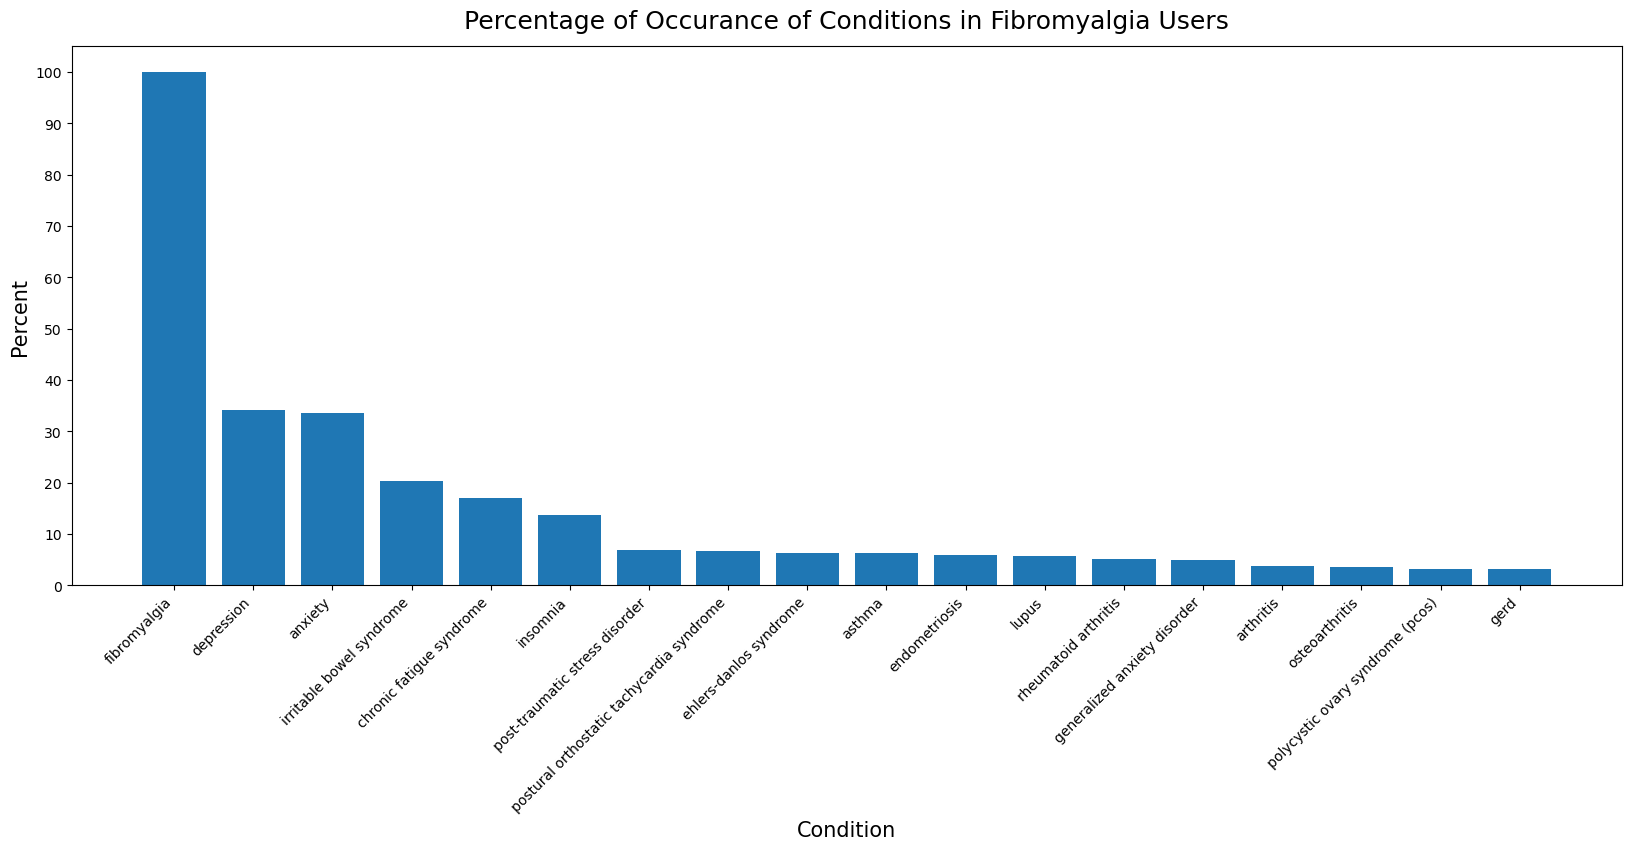

In [31]:
labels = fibro_graph.keys()

plt.figure(figsize=(20,7))
plt.bar(x=fibro_graph.keys(), height=fibro_graph.values())
plt.xlabel("Condition", size=15)
plt.xticks((np.arange(0,18, step=1)), rotation=45, ha='right', visible=True)

plt.ylabel("Percent", size=15)
plt.yticks(np.arange(0,110, step=10))

plt.title("Percentage of Occurance of Conditions in Fibromyalgia Users", size=18, pad=13)

plt.show()

In [32]:
notfib_graph = dict((df_nonfibro_conds_filt .groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(19) / df_nonfibro_conds_filt.ids.nunique())*100)

notfib_graph

{'anxiety': 40.58920932799779,
 'depression': 37.042914309369394,
 'irritable bowel syndrome': 14.157582447909482,
 'postural orthostatic tachycardia syndrome': 12.908789844073409,
 'insomnia': 12.839795777563129,
 'chronic fatigue syndrome': 12.398233751897337,
 'ehlers-danlos syndrome': 11.998068166137713,
 'endometriosis': 11.321926314336967,
 'lupus': 7.679039602594178,
 'asthma': 6.892507244376983,
 'post-traumatic stress disorder': 5.077963295156616,
 'generalized anxiety disorder': 5.022768041948392,
 'rheumatoid arthritis': 4.898578722229888,
 'polycystic ovary syndrome (pcos)': 3.0909341796605494,
 'arthritis': 2.9805436732441013,
 'gerd': 2.973644266593073,
 'osteoarthritis': 1.5385676831792465}

In [33]:

len(notfib_graph)

17

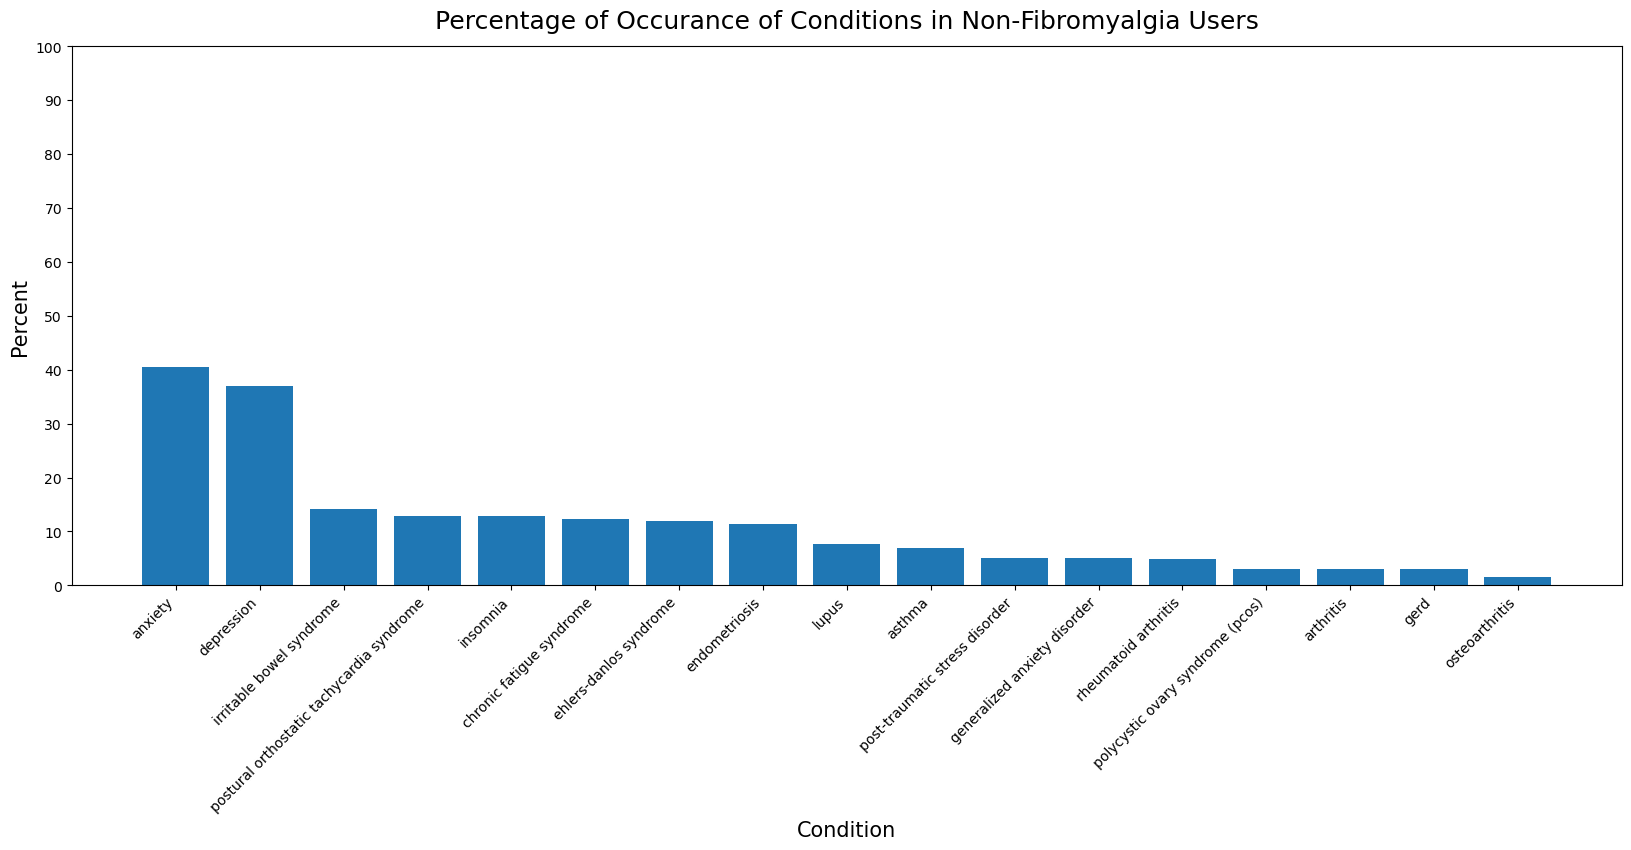

In [34]:
labels = notfib_graph.keys()

plt.figure(figsize=(20,7))
plt.bar(x=notfib_graph.keys(), height=notfib_graph.values())
plt.xlabel("Condition", size=15)
plt.xticks((np.arange(0,17, step=1)), rotation=45, ha='right', visible=True)

plt.ylabel("Percent", size=15)
plt.yticks(np.arange(0,110, step=10))

plt.title("Percentage of Occurance of Conditions in Non-Fibromyalgia Users", size=18, pad=13)

plt.show()

In [35]:
from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles


In [36]:
def overlap_finder(list1, list2):
    from matplotlib_venn import venn2, venn3, venn2_circles, venn3_circles
    num = 0
    overlap = list()
    nots = list()


    # Getting the overlap and distinct from list 1 to list 2
    for item in list1:
        if item in list2:
            num= num + 1
            overlap.append(item)
        else:
            nots.append(item)

    # Getting the nonoverlapping conditions from list2 not in list1 
    for item in list2:
        if item in list1:
            pass
        else:
            item= f"nonfibro_{item}"
            nots.append(item)
    
    print(f"There are {len(list1)} items in list 1, and {len(list2)} items in list 2.")
    print(f"There are {num} overlapping items between the lists.")
    print(f"Here are the overlapping items: {overlap}")
    print(f"Here are non-overlapping items: {nots}")

    plt.figure(figsize=(10,7))
    venn2([set(list1), set(list2)])
    venn2_circles([set(list1), set(list2)], lw=0.7)
    plt.show()

    return overlap, nots

There are 18 items in list 1, and 13 items in list 2.
There are 13 overlapping items between the lists.
Here are the overlapping items: ['depression', 'anxiety', 'irritable bowel syndrome', 'chronic fatigue syndrome', 'insomnia', 'post-traumatic stress disorder', 'postural orthostatic tachycardia syndrome', 'ehlers-danlos syndrome', 'asthma', 'endometriosis', 'lupus', 'rheumatoid arthritis', 'generalized anxiety disorder']
Here are non-overlapping items: ['fibromyalgia', 'arthritis', 'osteoarthritis', 'polycystic ovary syndrome (pcos)', 'gerd']


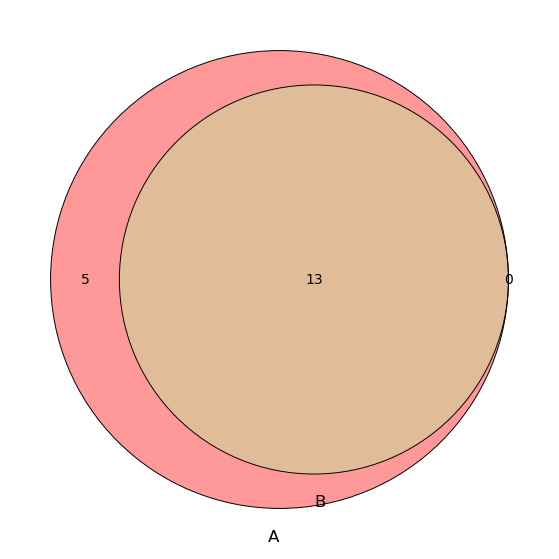

In [37]:
conds_overlap, conds_nots = overlap_finder(comorb_list, non_fibro_conds_list) # Here are the nonoverlapping conditions before selecting the final data

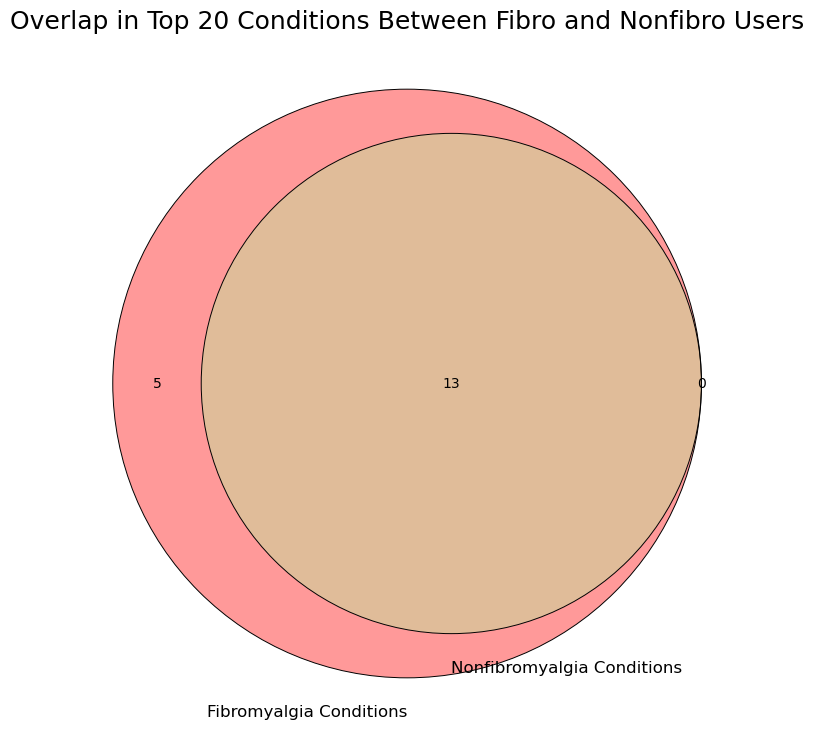

In [38]:
plt.figure(figsize=(15,9))
venn2([set(comorb_list), set(non_fibro_conds_list)], set_labels=("Fibromyalgia Conditions", "Nonfibromyalgia Conditions"))
plt.title('Overlap in Top 20 Conditions Between Fibro and Nonfibro Users', size=18)
venn2_circles([set(comorb_list), set(non_fibro_conds_list)], lw=0.7)

plt.savefig('2-Aggregation Images and Figures/Conditions_Overlap.png')
plt.show()



#### Create Binary Classification Dataset

In [39]:
# Get final ids for each

fibro_final_ids = df_fibro_conds_filt.ids.unique().tolist()

len(fibro_final_ids)

7190

In [40]:
notfibro_final_ids = df_nonfibro_conds_filt.ids.unique().tolist()

len(notfibro_final_ids)

14494

In [41]:
df_binary = pd.concat([df_fibro_conds_filt, df_nonfibro_conds_filt])

df_binary.groupby(by='target').ids.nunique()

target
0    14494
1     7190
Name: ids, dtype: int64

In [42]:
df_binary_ids = list(df_binary.ids.unique())

len(df_binary_ids)

21684

In [43]:
df_binary.trackable_name.nunique()

18

### Symptom Extraction

In [44]:
len(fibro_final_ids)

7190

In [45]:
len(notfibro_final_ids)

14494

In [46]:
df_symps.head(10)

,ids,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month
0,3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,34.0,female,CA,2017-04-28,123,Symptom,stiffness,3,2017,4
1,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-17,245,Symptom,mania,0,2015,7
2,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-17,246,Symptom,intrusive thoughts,0,2015,7
3,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-17,197,Symptom,stomach cramps,2,2015,7
4,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-17,247,Symptom,ovarian pain,0,2015,7
5,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-17,56,Symptom,diarrhea,3,2015,7
6,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-19,56,Symptom,diarrhea,3,2015,7
7,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-19,197,Symptom,stomach cramps,2,2015,7
8,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-19,245,Symptom,mania,0,2015,7
9,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-19,246,Symptom,intrusive thoughts,0,2015,7


In [47]:
df_symps_fibro = df_symps[df_symps['ids'].isin(fibro_final_ids)]

df_symps_fibro.ids.nunique()

7180

In [48]:
df_symps_fibro['target'] = 1

In [49]:
df_symps_fibro.head(5)

,ids,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month,target
59,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,243,Symptom,stomach pain,4,2015,5,1
60,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,249,Symptom,anhedonia,3,2015,5,1
61,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,257,Symptom,migraine,1,2015,5,1
62,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,197,Symptom,stomach cramps,3,2015,5,1
63,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,258,Symptom,subluxation or dislocation,4,2015,5,1


In [50]:
df_symps_notfibro = df_symps[df_symps['ids'].isin(notfibro_final_ids)]

df_symps_notfibro.ids.nunique()

14433

In [51]:
df_symps_notfibro['target'] = 0

In [52]:
df_symps_fibro.groupby(by=['trackable_name']).ids.nunique().sort_values(ascending=False).head(45) / (df_symps_fibro.ids.nunique())*100

trackable_name
fatigue                       66.699164
headache                      37.298050
back pain                     36.573816
brain fog                     31.991643
migraine                      28.774373
joint pain                    25.529248
chronic pain                  23.008357
nausea                        21.740947
dizziness or vertigo          17.089136
neck pain                     17.061281
numbness and tingling         15.654596
stiffness                     14.289694
hip pain                      13.551532
muscle pain                   13.509749
knee pain                     11.768802
shoulder pain                 11.699164
diarrhea                      11.559889
weakness                      10.933148
swelling                      10.487465
constipation                  10.348189
foot pain                     10.013928
abdominal pain                 9.317549
hand pain                      8.161560
chest pain                     7.910864
muscle spasm             

In [53]:
fibro_symps = dict((df_symps_fibro.groupby(by=['trackable_name']).ids.nunique().sort_values(ascending=False).head(42)) / (df_symps_fibro.ids.nunique())*100)

fibro_symps

{'fatigue': 66.6991643454039,
 'headache': 37.298050139275766,
 'back pain': 36.57381615598886,
 'brain fog': 31.991643454039,
 'migraine': 28.774373259052926,
 'joint pain': 25.52924791086351,
 'chronic pain': 23.008356545961004,
 'nausea': 21.740947075208915,
 'dizziness or vertigo': 17.0891364902507,
 'neck pain': 17.061281337047355,
 'numbness and tingling': 15.65459610027855,
 'stiffness': 14.289693593314764,
 'hip pain': 13.551532033426184,
 'muscle pain': 13.509749303621168,
 'knee pain': 11.768802228412255,
 'shoulder pain': 11.699164345403899,
 'diarrhea': 11.559888579387186,
 'weakness': 10.933147632311977,
 'swelling': 10.487465181058496,
 'constipation': 10.348189415041782,
 'foot pain': 10.01392757660167,
 'abdominal pain': 9.317548746518106,
 'hand pain': 8.161559888579387,
 'chest pain': 7.910863509749304,
 'muscle spasm': 6.671309192200557,
 'leg pain': 6.587743732590528,
 'stomach pain': 6.309192200557103,
 'bloating': 6.030640668523677,
 'sweating': 5.445682451253482,

In [54]:
fibro_sympslist = list(fibro_symps.keys())

fibro_sympslist

['fatigue',
 'headache',
 'back pain',
 'brain fog',
 'migraine',
 'joint pain',
 'chronic pain',
 'nausea',
 'dizziness or vertigo',
 'neck pain',
 'numbness and tingling',
 'stiffness',
 'hip pain',
 'muscle pain',
 'knee pain',
 'shoulder pain',
 'diarrhea',
 'weakness',
 'swelling',
 'constipation',
 'foot pain',
 'abdominal pain',
 'hand pain',
 'chest pain',
 'muscle spasm',
 'leg pain',
 'stomach pain',
 'bloating',
 'sweating',
 'nerve pain',
 'irritability',
 'palpitations',
 'rash',
 'lightheadedness',
 'shortness of breath',
 'light sensitivity',
 'arm pain',
 'vomiting',
 'jaw pain',
 'difficulty concentrating',
 'stomach cramps',
 'muscle ache']

In [55]:
df_symps_notfibro.groupby(by=['trackable_name']).ids.nunique().sort_values(ascending=False).head(47) / (df_symps_notfibro.ids.nunique())*100

trackable_name
fatigue                       61.768170
headache                      37.497402
nausea                        27.014481
back pain                     24.894339
brain fog                     24.416268
joint pain                    23.217626
migraine                      20.605557
dizziness or vertigo          19.102058
diarrhea                      14.168918
constipation                  11.778563
chronic pain                  11.577635
numbness and tingling         11.563777
abdominal pain                11.487563
neck pain                     10.760064
bloating                      10.233493
weakness                       9.741564
swelling                       9.180351
hip pain                       9.152636
stiffness                      8.930922
knee pain                      8.688422
stomach pain                   7.732280
chest pain                     7.538280
shoulder pain                  7.025566
foot pain                      6.713781
muscle pain              

In [56]:
notfibro_symps = dict((df_symps_notfibro.groupby(by=['trackable_name']).ids.nunique().sort_values(ascending=False).head(46)) / (df_symps_notfibro.ids.nunique())*100)

notfibro_symps

{'fatigue': 61.76817016559274,
 'headache': 37.49740178757015,
 'nausea': 27.014480703942358,
 'back pain': 24.894339361186173,
 'brain fog': 24.41626827409409,
 'joint pain': 23.21762627312409,
 'migraine': 20.605556710316637,
 'dizziness or vertigo': 19.10205778424444,
 'diarrhea': 14.168918450772535,
 'constipation': 11.778563015312132,
 'chronic pain': 11.577634587403866,
 'numbness and tingling': 11.563777454444676,
 'abdominal pain': 11.487563223169127,
 'neck pain': 10.760063742811612,
 'bloating': 10.233492690362365,
 'weakness': 9.741564470311094,
 'swelling': 9.180350585463867,
 'hip pain': 9.152636319545486,
 'stiffness': 8.930922192198434,
 'knee pain': 8.688422365412595,
 'stomach pain': 7.732280191228434,
 'chest pain': 7.538280329799764,
 'shoulder pain': 7.025566410309707,
 'foot pain': 6.713780918727916,
 'muscle pain': 6.24263839811543,
 'palpitations': 5.937781473013234,
 'irritability': 5.67449594678861,
 'hand pain': 5.355781888727222,
 'rash': 5.348853322247627,
 

In [57]:
notfibro_sympslist = list(notfibro_symps.keys())

notfibro_sympslist

['fatigue',
 'headache',
 'nausea',
 'back pain',
 'brain fog',
 'joint pain',
 'migraine',
 'dizziness or vertigo',
 'diarrhea',
 'constipation',
 'chronic pain',
 'numbness and tingling',
 'abdominal pain',
 'neck pain',
 'bloating',
 'weakness',
 'swelling',
 'hip pain',
 'stiffness',
 'knee pain',
 'stomach pain',
 'chest pain',
 'shoulder pain',
 'foot pain',
 'muscle pain',
 'palpitations',
 'irritability',
 'hand pain',
 'rash',
 'lightheadedness',
 'vomiting',
 'shortness of breath',
 'sweating',
 'subluxation or dislocation',
 'tachycardia',
 'menstrual cramps',
 'stomach cramps',
 'sore throat',
 'muscle spasm',
 'leg pain',
 'pelvic pain',
 'gas',
 'light sensitivity',
 'nerve pain',
 'acid reflux',
 'difficulty concentrating']

There are 42 items in list 1, and 46 items in list 2.
There are 39 overlapping items between the lists.
Here are the overlapping items: ['fatigue', 'headache', 'back pain', 'brain fog', 'migraine', 'joint pain', 'chronic pain', 'nausea', 'dizziness or vertigo', 'neck pain', 'numbness and tingling', 'stiffness', 'hip pain', 'muscle pain', 'knee pain', 'shoulder pain', 'diarrhea', 'weakness', 'swelling', 'constipation', 'foot pain', 'abdominal pain', 'hand pain', 'chest pain', 'muscle spasm', 'leg pain', 'stomach pain', 'bloating', 'sweating', 'nerve pain', 'irritability', 'palpitations', 'rash', 'lightheadedness', 'shortness of breath', 'light sensitivity', 'vomiting', 'difficulty concentrating', 'stomach cramps']
Here are non-overlapping items: ['arm pain', 'jaw pain', 'muscle ache', 'nonfibro_subluxation or dislocation', 'nonfibro_tachycardia', 'nonfibro_menstrual cramps', 'nonfibro_sore throat', 'nonfibro_pelvic pain', 'nonfibro_gas', 'nonfibro_acid reflux']


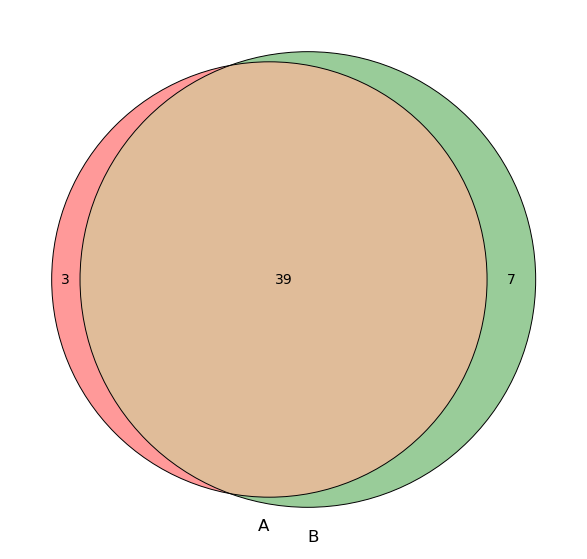

In [58]:
symps_overlap, symps_not = overlap_finder(fibro_sympslist, notfibro_sympslist)

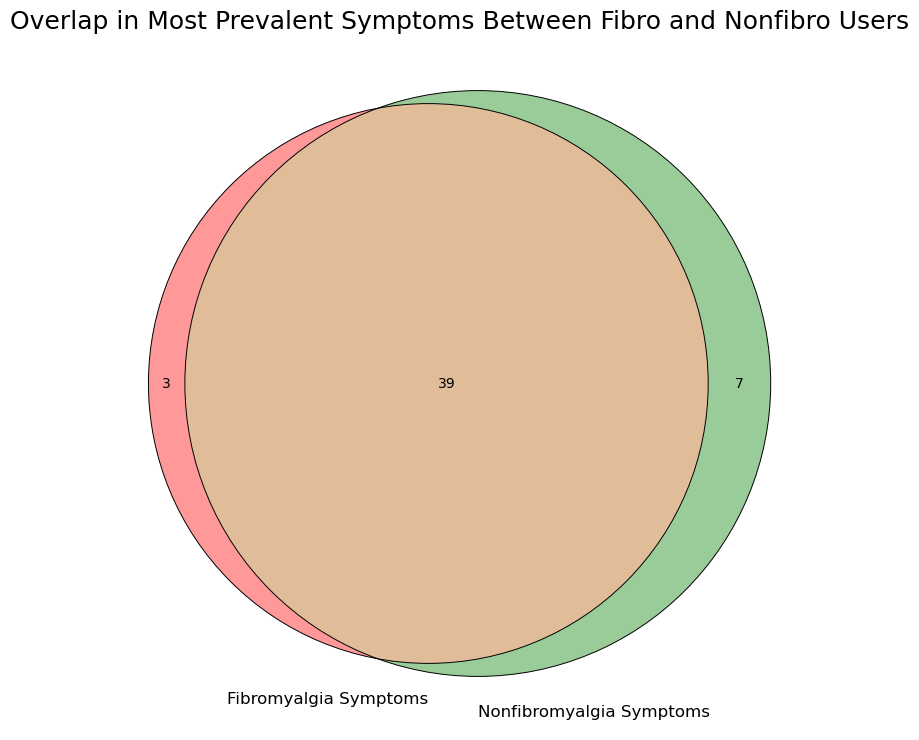

In [59]:
plt.figure(figsize=(15,9))
venn2([set(fibro_sympslist), set(notfibro_sympslist)], set_labels=("Fibromyalgia Symptoms", "Nonfibromyalgia Symptoms"))
plt.title('Overlap in Most Prevalent Symptoms Between Fibro and Nonfibro Users', size=18)
venn2_circles([set(fibro_sympslist), set(notfibro_sympslist)], lw=0.7)

plt.savefig('2-Aggregation Images and Figures/Symptoms_Overlap.png')
plt.show()

**Getting Final Symps Dataframes**

In [60]:
fibro_final_symplist = fibro_sympslist + notfibro_sympslist

len(fibro_final_symplist)

88

In [61]:
df_symps_fibro_final = df_symps_fibro[df_symps_fibro['trackable_name'].isin(fibro_final_symplist)]

df_symps_fibro_final.trackable_name.nunique() 


49

In [62]:
fibro_symps_final = dict((df_symps_fibro_final.groupby(by=['trackable_name']).ids.nunique().sort_values(ascending=False)) / (df_symps_fibro_final.ids.nunique())*100)

len(fibro_symps_final)

49

In [63]:
labels = fibro_symps_final.keys()

labels

dict_keys(['fatigue', 'headache', 'back pain', 'brain fog', 'migraine', 'joint pain', 'chronic pain', 'nausea', 'dizziness or vertigo', 'neck pain', 'numbness and tingling', 'stiffness', 'hip pain', 'muscle pain', 'knee pain', 'shoulder pain', 'diarrhea', 'weakness', 'swelling', 'constipation', 'foot pain', 'abdominal pain', 'hand pain', 'chest pain', 'muscle spasm', 'leg pain', 'stomach pain', 'bloating', 'sweating', 'nerve pain', 'irritability', 'palpitations', 'rash', 'lightheadedness', 'shortness of breath', 'light sensitivity', 'arm pain', 'vomiting', 'jaw pain', 'difficulty concentrating', 'stomach cramps', 'muscle ache', 'subluxation or dislocation', 'menstrual cramps', 'sore throat', 'tachycardia', 'acid reflux', 'pelvic pain', 'gas'])

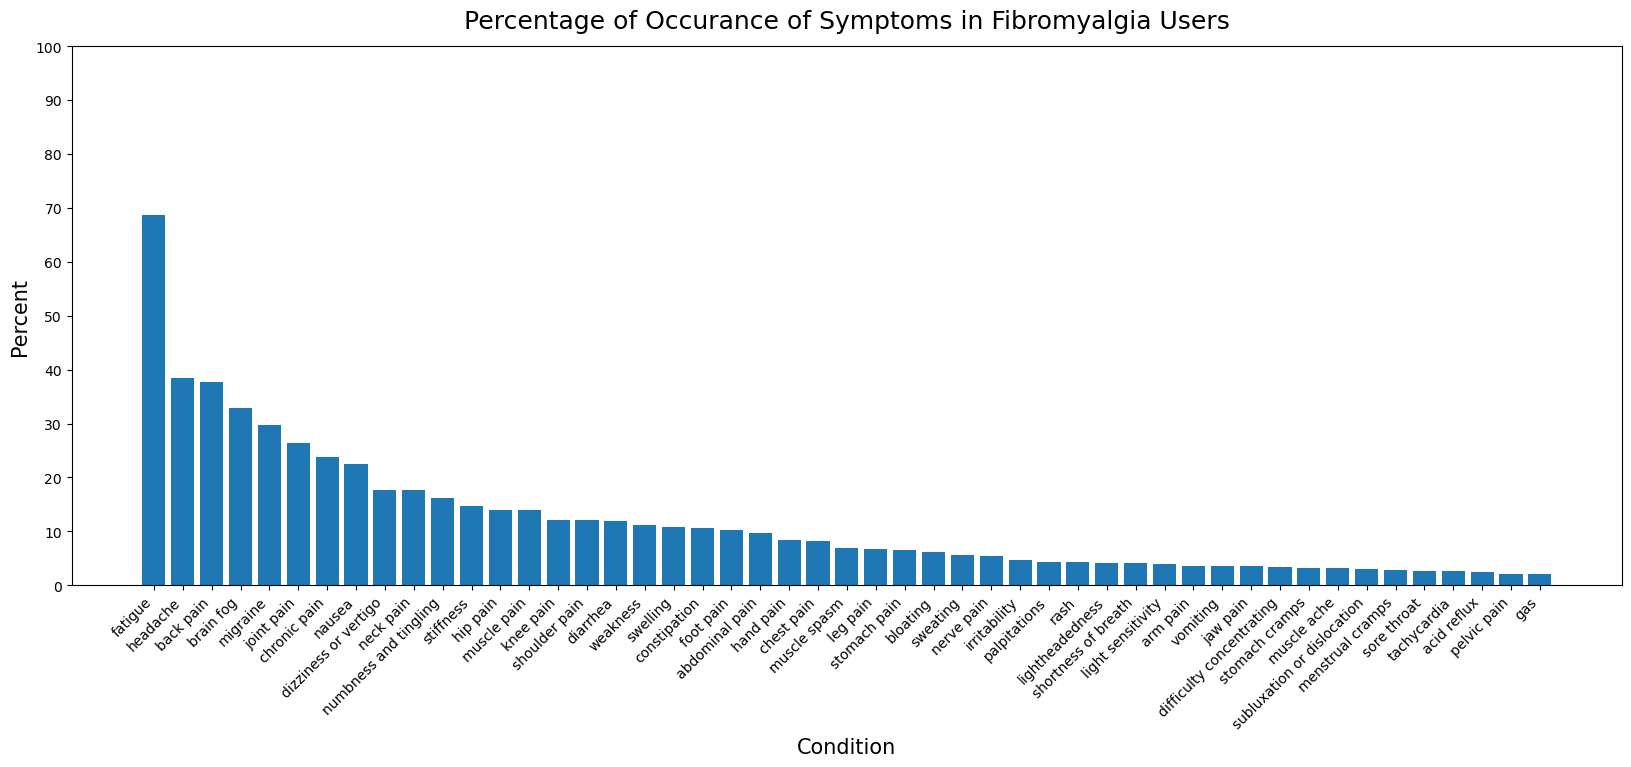

In [64]:
labels = fibro_symps_final.keys()

plt.figure(figsize=(20,7))
plt.bar(x=fibro_symps_final.keys(), height=fibro_symps_final.values())
plt.xlabel("Condition", size=15)
plt.xticks((np.arange(0,49, step=1)), rotation=45, ha='right', visible=True)

plt.ylabel("Percent", size=15)
plt.yticks(np.arange(0,110, step=10))

plt.title("Percentage of Occurance of Symptoms in Fibromyalgia Users", size=18, pad=13)

plt.show()

In [65]:
df_symps_fibro_final.ids.nunique() # Some users were dropped

6966

In [66]:
df_symps_notfibro.trackable_name.nunique() # There are 11,976 symptoms in the original notfibro dataframe

10458

In [67]:
df_symps_notfibro.head(5)

,ids,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month,target
1,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-17,245,Symptom,mania,0,2015,7,0
2,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-17,246,Symptom,intrusive thoughts,0,2015,7,0
3,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-17,197,Symptom,stomach cramps,2,2015,7,0
4,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-17,247,Symptom,ovarian pain,0,2015,7,0
5,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-17,56,Symptom,diarrhea,3,2015,7,0


In [68]:
df_symps_notfibro_final = df_symps_notfibro[df_symps_notfibro['trackable_name'].isin(fibro_final_symplist)]

df_symps_notfibro_final.trackable_name.nunique() # now there are 45 symptoms

49

In [69]:
df_symps_notfibro_final.ids.nunique() 

13753

In [70]:
df_symps_notfibro_final.head(5)

,ids,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month,target
3,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-17,197,Symptom,stomach cramps,2,2015,7,0
5,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-17,56,Symptom,diarrhea,3,2015,7,0
6,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-19,56,Symptom,diarrhea,3,2015,7,0
7,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-19,197,Symptom,stomach cramps,2,2015,7,0
10,6,QEVuQwEAt9BT8darNBUVXse2TEL3SA==,31.0,female,US,2015-07-19,248,Symptom,palpitations,1,2015,7,0


In [71]:
notfibro_symps_final = dict((df_symps_notfibro_final.groupby(by=['trackable_name']).ids.nunique().sort_values(ascending=False)) / (df_symps_notfibro_final.ids.nunique())*100)

len(notfibro_symps_final)

49

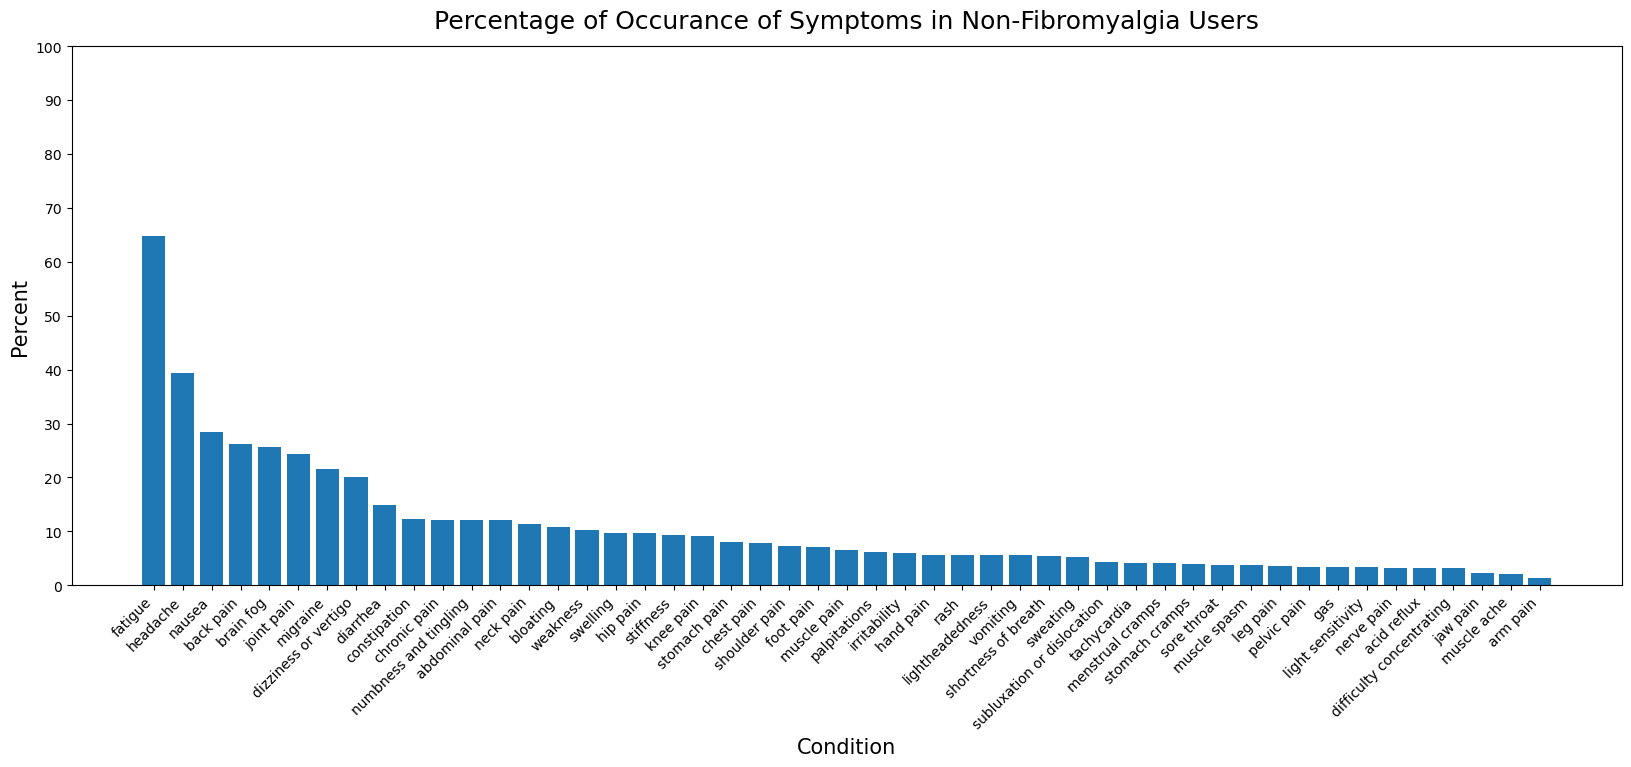

In [72]:
labels = notfibro_symps_final.keys()

plt.figure(figsize=(20,7))
plt.bar(x=notfibro_symps_final.keys(), height=notfibro_symps_final.values())
plt.xlabel("Condition", size=15)
plt.xticks((np.arange(0,49, step=1)), rotation=45, ha='right', visible=True)

plt.ylabel("Percent", size=15)
plt.yticks(np.arange(0,110, step=10))

plt.title("Percentage of Occurance of Symptoms in Non-Fibromyalgia Users", size=18, pad=13)

plt.show()

#### Combine the Symptom Dataframes Together

In [73]:
df_symps_final = pd.concat([df_symps_fibro_final, df_symps_notfibro_final])

df_symps_final.groupby(by='target').ids.nunique()

target
0    13753
1     6966
Name: ids, dtype: int64

### Create Final Nonaggregated Dataframe (Conditions and Symptoms)

In [74]:
# Creating final dataframe
df_binary_final = pd.concat([df_binary, df_symps_final])

df_binary_final.groupby(by='target').ids.nunique()

target
0    14494
1     7190
Name: ids, dtype: int64

In [75]:
df_binary_final.head(5)

,ids,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month,target
41,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,397,Condition,fibromyalgia,2,2015,5,1
42,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,1132,Condition,postural orthostatic tachycardia syndrome,3,2015,5,1
43,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,350,Condition,ehlers-danlos syndrome,1,2015,5,1
49,17,QEVuQwEAT556zzFRIWMYQwW/SuVuQg==,33.0,female,US,2015-12-08,397,Condition,fibromyalgia,1,2015,12,1
50,17,QEVuQwEAT556zzFRIWMYQwW/SuVuQg==,33.0,female,US,2015-12-08,561,Condition,irritable bowel syndrome,2,2015,12,1


### Final Dataframe Creation: Cleaning, Aggregation, and Initial Feature Engineering

In [76]:
# Want to collapse: anxiety and general anxiety disorder, fatigue and chronic fatigue, back pain and lower back pain,'pots' and 'postural orthostatic tachycardia syndrome'
dict(df_binary_final.groupby(by='trackable_type').trackable_name.unique())

{'Condition': array(['fibromyalgia', 'postural orthostatic tachycardia syndrome',
        'ehlers-danlos syndrome', 'irritable bowel syndrome',
        'osteoarthritis', 'depression', 'asthma', 'anxiety', 'arthritis',
        'insomnia', 'endometriosis', 'gerd', 'lupus',
        'generalized anxiety disorder', 'post-traumatic stress disorder',
        'chronic fatigue syndrome', 'rheumatoid arthritis',
        'polycystic ovary syndrome (pcos)'], dtype=object),
 'Symptom': array(['stomach pain', 'migraine', 'stomach cramps',
        'subluxation or dislocation', 'back pain', 'headache',
        'muscle pain', 'shoulder pain', 'fatigue', 'bloating',
        'abdominal pain', 'knee pain', 'brain fog', 'chronic pain', 'gas',
        'weakness', 'constipation', 'neck pain', 'diarrhea', 'jaw pain',
        'joint pain', 'dizziness or vertigo', 'light sensitivity',
        'palpitations', 'stiffness', 'sore throat', 'shortness of breath',
        'irritability', 'nausea', 'difficulty concent

### Fibromyalgia Filtering Last Time

Removing Users who only have fibromyalgia logged and nothing else...There don't appear to be any! Every user has at least one condition and one symptom!

In [77]:
df_binary_final.groupby(by='ids').trackable_name.nunique().min()

1

In [78]:
df_binary_final.groupby(by='ids').trackable_type.nunique().min()

1

In [79]:
# filtering again to one symptom and one condition
df_fibro_filtered = filterer(df_binary_final)



There are 21684 users the dataset


There are 21684 users that have logged conditions
There are 20719 users that have logged symptoms


There are 20719 users who have logged one or more symptoms.


There are 20719 users that have logged both conditions and symptoms.


Removing 965 users from the dataset


There are now 20719 users in your dataframe.
Here is your dataframe!


# Aggregation

In [80]:
binary_DV_list = ['fibromyalgia']

In [81]:
test_pls = df_fibro_filtered.head(200)

test_pls

,ids,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month,target
41,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,397,Condition,fibromyalgia,2,2015,5,1
42,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,1132,Condition,postural orthostatic tachycardia syndrome,3,2015,5,1
43,14,QEVuQwEA6PPwjZ8tnqC1KHhapbdMpQ==,24.0,female,US,2015-05-25,350,Condition,ehlers-danlos syndrome,1,2015,5,1
49,17,QEVuQwEAT556zzFRIWMYQwW/SuVuQg==,33.0,female,US,2015-12-08,397,Condition,fibromyalgia,1,2015,12,1
50,17,QEVuQwEAT556zzFRIWMYQwW/SuVuQg==,33.0,female,US,2015-12-08,561,Condition,irritable bowel syndrome,2,2015,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,253,QEVuQwEAWQUDqEf+yn9u8nn/hqxetw==,26.0,female,US,2015-05-31,397,Condition,fibromyalgia,2,2015,5,1
1805,253,QEVuQwEAWQUDqEf+yn9u8nn/hqxetw==,26.0,female,US,2015-07-16,397,Condition,fibromyalgia,2,2015,7,1
1806,253,QEVuQwEAWQUDqEf+yn9u8nn/hqxetw==,26.0,female,US,2015-07-01,397,Condition,fibromyalgia,2,2015,7,1
1807,253,QEVuQwEAWQUDqEf+yn9u8nn/hqxetw==,26.0,female,US,2015-08-01,397,Condition,fibromyalgia,1,2015,8,1


In [82]:
df = test_pls.copy()
bad_ids = list()

ids_list = df.ids.unique()

for id in ids_list:
    
       id_df = df[df['ids'] == id]

       print("\n\nHere is the info for user", id)

       # Take out the dependent variable, will append it last:

       id_fibro = id_df['target']

       print("Here is this user's fibro status", id_fibro.unique())

       id_df.drop(id_df[id_df.trackable_name == 'fibromyalgia'].index, inplace=True)


       print("Here is the new dataframe unique symptom and condition types:", id_df.trackable_name.unique())
       print("Here is the length of the new dataframe:", len(id_df))

       

       if len(id_df) == 0:
              print(f"User {id} has nothing!")
              bad_ids.append(id)
       else:
              print("This user is fine")




Here is the info for user 14
Here is this user's fibro status [1]
Here is the new dataframe unique symptom and condition types: ['postural orthostatic tachycardia syndrome' 'ehlers-danlos syndrome']
Here is the length of the new dataframe: 2
This user is fine


Here is the info for user 17
Here is this user's fibro status [1]
Here is the new dataframe unique symptom and condition types: ['irritable bowel syndrome' 'osteoarthritis']
Here is the length of the new dataframe: 4
This user is fine


Here is the info for user 25
Here is this user's fibro status [1]
Here is the new dataframe unique symptom and condition types: []
Here is the length of the new dataframe: 0
User 25 has nothing!


Here is the info for user 26
Here is this user's fibro status [1]
Here is the new dataframe unique symptom and condition types: []
Here is the length of the new dataframe: 0
User 26 has nothing!


Here is the info for user 28
Here is this user's fibro status [1]
Here is the new dataframe unique sympto

In [83]:
bad_ids

[25, 26, 28, 52, 88, 143, 147, 151, 163, 169, 172, 183, 224, 241, 248, 253]

In [84]:
print(test_pls.ids.nunique())

for id in bad_ids:
    test_pls.drop(test_pls[test_pls.ids == id].index, inplace=True)

print(test_pls.ids.nunique())

34
18


In [85]:
df_agg_test = data_aggregator(test_pls, binary_DV_list)

Beginning aggregation...


First, I will remove the dependent variables from the dataset conditions: 
	Removing fibromyalgia from the dataset


Here is the final condition list:
	postural orthostatic tachycardia syndrome
	ehlers-danlos syndrome
	irritable bowel syndrome
	osteoarthritis
	depression
	asthma
	anxiety
	arthritis
	insomnia
	endometriosis
	gerd
	lupus
	generalized anxiety disorder
	post-traumatic stress disorder


Here is the final symptoms list:
Extracting user level information...


Creating the following basic variables: 
o Age
o Gender
o Country
o Fibromyalgia
o Total Logs
o Total Unique Dates (Days)
o Total Logging Rate
o Conditions Total
o Symptoms Total


Creating the following variables for each condition and symptom: 
o Condition/Symptom Binary (0/1)
o Condition/Symptom Total Logs
o Condition/Symptom Activity (median trackable value)
o Condition/Symptom Unique Dates (Days) 
o Condition/Symptom Log Rate


This will take a while. Perhaps grab a coffee?


  0%|          | 0/18 [00:00<?, ?it/s]



Done! Creating the dataframe...
Fixing the column names for modeling...
Here are your new columns!
	 ids
	 age
	 gender
	 country
	 target
	 total_logs
	 total_unique_dates_days
	 total_log_rate
	 conditions_total
	 fibro_comorbidities
	 postural_orthostatic_tachycardia_syndrome
	 postural_orthostatic_tachycardia_syndrome_total_logs
	 postural_orthostatic_tachycardia_syndrome_activity
	 postural_orthostatic_tachycardia_syndrome_unique_dates_days
	 postural_orthostatic_tachycardia_syndrome_log_rate
	 ehlers-danlos_syndrome
	 ehlers-danlos_syndrome_total_logs
	 ehlers-danlos_syndrome_activity
	 ehlers-danlos_syndrome_unique_dates_days
	 ehlers-danlos_syndrome_log_rate
	 irritable_bowel_syndrome
	 irritable_bowel_syndrome_total_logs
	 irritable_bowel_syndrome_activity
	 irritable_bowel_syndrome_unique_dates_days
	 irritable_bowel_syndrome_log_rate
	 osteoarthritis
	 osteoarthritis_total_logs
	 osteoarthritis_activity
	 osteoarthritis_unique_dates_days
	 osteoarthritis_log_rate
	 depress

In [86]:
df_agg_test.iloc[0:5, 0:15]

,ids,age,gender,country,target,total_logs,total_unique_dates_days,total_log_rate,conditions_total,fibro_comorbidities,postural_orthostatic_tachycardia_syndrome,postural_orthostatic_tachycardia_syndrome_total_logs,postural_orthostatic_tachycardia_syndrome_activity,postural_orthostatic_tachycardia_syndrome_unique_dates_days,postural_orthostatic_tachycardia_syndrome_log_rate
0,14,24,female,US,1,2,1,2.0,2,0,1,1,3,1,1.000
1,17,33,female,US,1,4,2,2.0,2,0,0,0,0,0,0.000
2,78,29,female,US,1,6,2,3.0,3,1,0,0,0,0,0.000
3,96,28,other,US,1,8,4,2.0,2,1,0,0,0,0,0.000
4,126,45,female,US,1,28,8,3.5,5,1,1,5,2,8,0.625


In [87]:
df_agg_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 81 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ids                                                          18 non-null     int64  
 1   age                                                          18 non-null     int32  
 2   gender                                                       18 non-null     object 
 3   country                                                      18 non-null     object 
 4   target                                                       18 non-null     int32  
 5   total_logs                                                   18 non-null     int64  
 6   total_unique_dates_days                                      18 non-null     int64  
 7   total_log_rate                                               18 non-null     float

In [88]:
df_agg_test.target.value_counts()

1    18
Name: target, dtype: int64

In [89]:
df_agg_test.describe()

,ids,age,target,total_logs,total_unique_dates_days,total_log_rate,conditions_total,fibro_comorbidities,postural_orthostatic_tachycardia_syndrome,postural_orthostatic_tachycardia_syndrome_total_logs,...,generalized_anxiety_disorder_total_logs,generalized_anxiety_disorder_activity,generalized_anxiety_disorder_unique_dates_days,generalized_anxiety_disorder_log_rate,post-traumatic_stress_disorder,post-traumatic_stress_disorder_total_logs,post-traumatic_stress_disorder_activity,post-traumatic_stress_disorder_unique_dates_days,post-traumatic_stress_disorder_log_rate,symptoms_total
count,18.000000,18.000000,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0
mean,166.555556,31.722222,1.0,6.166667,2.777778,2.185185,2.666667,0.611111,0.222222,0.444444,...,0.166667,0.111111,0.166667,0.055556,0.055556,0.055556,0.055556,0.055556,0.055556,0.0
std,75.591178,5.998093,0.0,6.519202,2.211083,0.905482,1.371989,0.697802,0.427793,1.199128,...,0.707107,0.471405,0.707107,0.235702,0.235702,0.235702,0.235702,0.235702,0.235702,0.0
min,14.000000,24.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,127.500000,26.500000,1.0,3.000000,1.000000,1.250000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,176.500000,31.500000,1.0,4.000000,2.000000,2.083333,2.500000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,229.500000,34.750000,1.0,6.750000,4.000000,3.000000,3.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,252.000000,45.000000,1.0,28.000000,8.000000,3.500000,5.000000,2.000000,1.000000,5.000000,...,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [90]:
df_fibro_filtered.trackable_name.value_counts().index.tolist()

['fatigue',
 'headache',
 'anxiety',
 'depression',
 'back pain',
 'nausea',
 'brain fog',
 'migraine',
 'joint pain',
 'dizziness or vertigo',
 'fibromyalgia',
 'numbness and tingling',
 'diarrhea',
 'neck pain',
 'irritable bowel syndrome',
 'weakness',
 'constipation',
 'swelling',
 'stiffness',
 'chronic fatigue syndrome',
 'hip pain',
 'insomnia',
 'knee pain',
 'chronic pain',
 'abdominal pain',
 'muscle pain',
 'bloating',
 'shoulder pain',
 'foot pain',
 'postural orthostatic tachycardia syndrome',
 'stomach pain',
 'sweating',
 'chest pain',
 'hand pain',
 'irritability',
 'palpitations',
 'ehlers-danlos syndrome',
 'sore throat',
 'rash',
 'shortness of breath',
 'endometriosis',
 'asthma',
 'lightheadedness',
 'vomiting',
 'muscle spasm',
 'subluxation or dislocation',
 'post-traumatic stress disorder',
 'nerve pain',
 'leg pain',
 'lupus',
 'generalized anxiety disorder',
 'difficulty concentrating',
 'light sensitivity',
 'menstrual cramps',
 'gas',
 'pelvic pain',
 'acid 

In [91]:
df_agg_fibro_binary = data_aggregator(df_fibro_filtered, binary_DV_list)

df_agg_fibro_binary

Beginning aggregation...


First, I will remove the dependent variables from the dataset conditions: 
	Removing fibromyalgia from the dataset


Here is the final condition list:
	postural orthostatic tachycardia syndrome
	ehlers-danlos syndrome
	irritable bowel syndrome
	osteoarthritis
	depression
	asthma
	anxiety
	arthritis
	insomnia
	endometriosis
	gerd
	lupus
	generalized anxiety disorder
	post-traumatic stress disorder
	chronic fatigue syndrome
	rheumatoid arthritis
	polycystic ovary syndrome (pcos)


Here is the final symptoms list:
	stomach pain
	migraine
	stomach cramps
	subluxation or dislocation
	back pain
	headache
	muscle pain
	shoulder pain
	fatigue
	bloating
	abdominal pain
	knee pain
	brain fog
	chronic pain
	gas
	weakness
	constipation
	neck pain
	diarrhea
	jaw pain
	joint pain
	dizziness or vertigo
	light sensitivity
	palpitations
	stiffness
	sore throat
	shortness of breath
	irritability
	nausea
	difficulty concentrating
	chest pain
	numbness and tingling
	acid reflux


  0%|          | 0/20713 [00:00<?, ?it/s]



Done! Creating the dataframe...
Fixing the column names for modeling...
Here are your new columns!
	 ids
	 age
	 gender
	 country
	 target
	 total_logs
	 total_unique_dates_days
	 total_log_rate
	 conditions_total
	 fibro_comorbidities
	 postural_orthostatic_tachycardia_syndrome
	 postural_orthostatic_tachycardia_syndrome_total_logs
	 postural_orthostatic_tachycardia_syndrome_activity
	 postural_orthostatic_tachycardia_syndrome_unique_dates_days
	 postural_orthostatic_tachycardia_syndrome_log_rate
	 ehlers-danlos_syndrome
	 ehlers-danlos_syndrome_total_logs
	 ehlers-danlos_syndrome_activity
	 ehlers-danlos_syndrome_unique_dates_days
	 ehlers-danlos_syndrome_log_rate
	 irritable_bowel_syndrome
	 irritable_bowel_syndrome_total_logs
	 irritable_bowel_syndrome_activity
	 irritable_bowel_syndrome_unique_dates_days
	 irritable_bowel_syndrome_log_rate
	 osteoarthritis
	 osteoarthritis_total_logs
	 osteoarthritis_activity
	 osteoarthritis_unique_dates_days
	 osteoarthritis_log_rate
	 depress

,ids,age,gender,country,target,total_logs,total_unique_dates_days,total_log_rate,conditions_total,fibro_comorbidities,...,nerve_pain,nerve_pain_total_logs,nerve_pain_activity,nerve_pain_unique_dates_days,nerve_pain_log_rate,menstrual_cramps,menstrual_cramps_total_logs,menstrual_cramps_activity,menstrual_cramps_unique_dates_days,menstrual_cramps_log_rate
0,14,24,female,US,1,7,1,7.000000,2,0,...,0,0,0,0,0.0,0,0,0,0,0.0
1,17,33,female,US,1,18,2,9.000000,3,0,...,0,0,0,0,0.0,0,0,0,0,0.0
2,78,29,female,US,1,16,3,5.333333,3,1,...,0,0,0,0,0.0,0,0,0,0,0.0
3,96,28,other,US,1,35,4,8.750000,3,2,...,0,0,0,0,0.0,0,0,0,0,0.0
4,126,45,female,US,1,160,8,20.000000,6,1,...,0,0,0,0,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20708,36237,27,male,US,1,2,2,1.000000,0,0,...,0,0,0,0,0.0,0,0,0,0,0.0
20709,40129,40,female,US,1,16,4,4.000000,0,0,...,0,0,0,0,0.0,0,0,0,0,0.0
20710,41017,31,female,US,1,1,1,1.000000,0,0,...,0,0,0,0,0.0,0,0,0,0,0.0
20711,41499,33,female,US,1,4,1,4.000000,0,0,...,0,0,0,0,0.0,0,0,0,0,0.0


In [92]:
df_agg_fibro_binary.head(10)


,ids,age,gender,country,target,total_logs,total_unique_dates_days,total_log_rate,conditions_total,fibro_comorbidities,...,nerve_pain,nerve_pain_total_logs,nerve_pain_activity,nerve_pain_unique_dates_days,nerve_pain_log_rate,menstrual_cramps,menstrual_cramps_total_logs,menstrual_cramps_activity,menstrual_cramps_unique_dates_days,menstrual_cramps_log_rate
0,14,24,female,US,1,7,1,7.000000,2,0,...,0,0,0,0,0.0,0,0,0,0,0.0
1,17,33,female,US,1,18,2,9.000000,3,0,...,0,0,0,0,0.0,0,0,0,0,0.0
2,78,29,female,US,1,16,3,5.333333,3,1,...,0,0,0,0,0.0,0,0,0,0,0.0
3,96,28,other,US,1,35,4,8.750000,3,2,...,0,0,0,0,0.0,0,0,0,0,0.0
4,126,45,female,US,1,160,8,20.000000,6,1,...,0,0,0,0,0.0,0,0,0,0,0.0
5,132,31,female,US,1,3,1,3.000000,1,0,...,0,0,0,0,0.0,0,0,0,0,0.0
6,161,25,female,CA,1,45,6,7.500000,5,2,...,0,0,0,0,0.0,0,0,0,0,0.0
7,167,33,other,CA,1,20,2,10.000000,3,0,...,0,0,0,0,0.0,0,0,0,0,0.0
8,175,35,female,US,1,28,2,14.000000,4,2,...,0,0,0,0,0.0,0,0,0,0,0.0
9,178,35,female,US,1,15,1,15.000000,3,0,...,0,0,0,0,0.0,0,0,0,0,0.0


In [93]:
df_agg_fibro_binary.to_csv('data/chronic_agg_fibro_binary.csv')

# Now Examine MultiClass Problem: Autoimmune Soft Predictions

Alright, so now that I have filtered, gathered and saved the binary fibromyalgia data to a separate .csv file, I will recreate the same process for a multiclass problem. I will do this in two ways:

1. Non-overalapping classes (all target classes are distinct)
2. Overlapping Classes (users can have combinations of the target classes, they are not distinct)

**spondyloarthropathy**

Spondyloarthropathies are a family of long-term (chronic) diseases of joints. These diseases occur in children (juvenile spondyloarthropathies) and adults. They include ankylosing spondylitis, reactive arthritis, psoriatic arthritis, and joint problems linked to inflammatory bowel disease (enteropathic arthritis).

from: https://myhealth.alberta.ca/Health/Pages/conditions.aspx?hwid=hw87580spec

**Disease Prevelances in the Dataset**

In [94]:
df_conds.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(24)

trackable_name
anxiety                                      8293
depression                                   7827
fibromyalgia                                 7190
irritable bowel syndrome                     3517
chronic fatigue syndrome                     3015
insomnia                                     2840
postural orthostatic tachycardia syndrome    2352
ehlers-danlos syndrome                       2198
endometriosis                                2064
lupus                                        1521
asthma                                       1454
post-traumatic stress disorder               1230
rheumatoid arthritis                         1085
generalized anxiety disorder                 1084
gastroparesis                                 738
crohn's disease                               728
hypothyroidism                                708
arthritis                                     698
polycystic ovary syndrome (pcos)              683
allergies                          

In [95]:
df_conds.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(32) / df_conds.ids.nunique()*100

trackable_name
anxiety                                      27.593665
depression                                   26.043122
fibromyalgia                                 23.923604
irritable bowel syndrome                     11.702269
chronic fatigue syndrome                     10.031943
insomnia                                      9.449657
postural orthostatic tachycardia syndrome     7.825913
ehlers-danlos syndrome                        7.313502
endometriosis                                 6.867638
lupus                                         5.060890
asthma                                        4.837958
post-traumatic stress disorder                4.092633
rheumatoid arthritis                          3.610168
generalized anxiety disorder                  3.606841
gastroparesis                                 2.455580
crohn's disease                               2.422307
hypothyroidism                                2.355760
arthritis                                     2.32

Conditions to consider:

* fibromyalgia: 23%
* pots: 7%
* lupus: 5%
* autoimmune arthritis: 6.5%
    * RA: 3.6%
    * spondyloarthropathy (ankylosing spondylitis, reactive arthritis, psoriatic arthritis, enteropathic arthritis): 2.9%
        * psoriatic arthritis       1.487680
        * ankylosing spondylitis    1.321644
        * reactive arthritis        0.089659
        * enteropathic arthritis    0.013283

I will get prevalance rates for the rest of these:

In [96]:
df_other_arths = df_conds[(df_conds['trackable_name'] == 'ankylosing spondylitis') | (df_conds['trackable_name'] == 'reactive arthritis') | (df_conds['trackable_name'] == 'psoriatic arthritis') | (df_conds['trackable_name'] == 'enteropathic arthritis')]

df_other_arths

,ids,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month
750,137,QEVuQwEA7DW43kyNYtVZfiLdDSGmIA==,25.0,female,SE,2015-06-06,849,Condition,psoriatic arthritis,0,2015,6
3146,380,QEVuQwEAP2KbTSP0gF+g5kMjTfzZfQ==,51.0,female,GB,2015-05-27,56,Condition,ankylosing spondylitis,2,2015,5
7468,465,QEVuQwEAP7mNEW9EJnrPhGAUWINARw==,59.0,male,US,2015-06-18,56,Condition,ankylosing spondylitis,3,2015,6
7477,468,QEVuQwEAuumUWWVR1AEqg40YTLFOnQ==,29.0,female,US,2015-06-18,56,Condition,ankylosing spondylitis,3,2015,6
7483,471,QEVuQwEATAsZbyM8FPQts9/ihbqPqg==,33.0,female,US,2015-07-02,56,Condition,ankylosing spondylitis,1,2015,7
...,...,...,...,...,...,...,...,...,...,...,...,...
868209,42255,QEVuQwEAIx5qMThF0404lNYi49qeSQ==,21.0,female,US,2019-10-30,56,Condition,ankylosing spondylitis,4,2019,10
868216,42255,QEVuQwEAIx5qMThF0404lNYi49qeSQ==,21.0,female,US,2019-11-05,56,Condition,ankylosing spondylitis,4,2019,11
868223,42255,QEVuQwEAIx5qMThF0404lNYi49qeSQ==,21.0,female,US,2019-11-22,56,Condition,ankylosing spondylitis,4,2019,11
868230,42255,QEVuQwEAIx5qMThF0404lNYi49qeSQ==,21.0,female,US,2019-11-25,56,Condition,ankylosing spondylitis,4,2019,11


In [97]:
df_other_arths.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(32) / df_conds.ids.nunique()*100

trackable_name
psoriatic arthritis       1.490650
ankylosing spondylitis    1.324283
reactive arthritis        0.089838
enteropathic arthritis    0.013309
Name: ids, dtype: float64

Converting ankylosing spondylitis, reactive arthritis, psoriatic arthritis, enteropathic arthritis into spondyloarthropathy group:

In [98]:
arth_list = list(('ankylosing spondylitis', 'reactive arthritis', 'psoriatic arthritis', 'enteropathic arthritis', 'rheumatoid arthritis'))

arth_ST = 'autoimmune arthritis'

In [99]:
to_exclude = list()

In [100]:
df_conds_multi  = entity_resolver(arth_list, to_exclude, df_conds, arth_ST)



Here are the items to exclude []
Keeping ankylosing spondylitis
Keeping reactive arthritis
Keeping psoriatic arthritis
Keeping enteropathic arthritis
Keeping rheumatoid arthritis


Here is the final list of things to resolve ['ankylosing spondylitis', 'reactive arthritis', 'psoriatic arthritis', 'enteropathic arthritis', 'rheumatoid arthritis']


Replacing the list with the string autoimmune arthritis
           ids                           user_id   age     sex country  \
0            3  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==  34.0  female      CA   
1            3  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==  34.0  female      CA   
2            3  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==  34.0  female      CA   
3            3  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==  34.0  female      CA   
4            3  QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==  34.0  female      CA   
...        ...                               ...   ...     ...     ...   
1014152  42276  QEVuQwEApxEBH8fQ/QfbwDfPFKPuQA==  21.0  female      US   
1

In [101]:
# Checking work:
df_conds_multi.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(32) / df_conds.ids.nunique()*100

trackable_name
anxiety                                      27.593665
depression                                   26.043122
fibromyalgia                                 23.923604
irritable bowel syndrome                     11.702269
chronic fatigue syndrome                     10.031943
insomnia                                      9.449657
postural orthostatic tachycardia syndrome     7.825913
ehlers-danlos syndrome                        7.313502
endometriosis                                 6.867638
autoimmune arthritis                          6.318626
lupus                                         5.060890
asthma                                        4.837958
post-traumatic stress disorder                4.092633
generalized anxiety disorder                  3.606841
gastroparesis                                 2.455580
crohn's disease                               2.422307
hypothyroidism                                2.355760
arthritis                                     2.32

**Multiclass Labels**

* Pots: 1
* Lupus: 2
* Autoimmune Arthritis: 3

**Top conditions for each type of autoimmune condition:**

For autoimmune arthritis, there is a 30% prevelance of fibromyalgia, 8.3% lupus, and 3.4% pots.

In [102]:
AR_ids = df_conds_multi[(df_conds_multi['trackable_name'] == 'autoimmune arthritis')].ids.unique()

df_AR = df_conds_multi[df_conds_multi['ids'].isin(AR_ids)]

df_AR.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(20) / df_AR.ids.nunique()*100 

trackable_name
autoimmune arthritis                         100.000000
fibromyalgia                                  30.700369
depression                                    22.169563
anxiety                                       21.748289
irritable bowel syndrome                       9.636651
lupus                                          8.636124
insomnia                                       8.267509
psoriasis                                      8.109531
chronic fatigue syndrome                       5.476567
asthma                                         5.265929
sjogren's syndrome                             4.949974
endometriosis                                  3.580832
osteoarthritis                                 3.580832
postural orthostatic tachycardia syndrome      3.475513
hypothyroidism                                 3.422854
post-traumatic stress disorder                 3.370195
generalized anxiety disorder                   3.001580
ehlers-danlos syndrome           

**postural_orthostatic_tachycardia_syndrome**	

In [103]:
# Checking work: there should be 1085 users in this dataframe
len(AR_ids)

1899

In [104]:
df_AR.ids.nunique()

1899

Dropping the users that have any of the overlapping conditions:

In [166]:
not_AR = ['postural orthostatic tachycardia syndrome', 'lupus']

AR_ids_drop = df_AR[df_AR['trackable_name'].isin(not_AR)].ids.unique().tolist()

df_AR_conds = df_AR[~df_AR['ids'].isin(AR_ids_drop)]

df_AR_conds.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(15) / df_AR_conds.ids.nunique()*100


trackable_name
autoimmune arthritis              100.000000
fibromyalgia                       29.228930
depression                         21.757322
anxiety                            20.621638
irritable bowel syndrome            9.085475
psoriasis                           8.607292
insomnia                            7.053198
chronic fatigue syndrome            5.020921
asthma                              4.901375
sjogren's syndrome                  4.004782
osteoarthritis                      3.586372
endometriosis                       3.526599
generalized anxiety disorder        3.227735
hypothyroidism                      3.227735
post-traumatic stress disorder      2.988643
Name: ids, dtype: float64

In [167]:
AR_conds = list(dict(df_AR_conds.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(14) / df_AR_conds.ids.nunique()*100).keys())

AR_conds

['autoimmune arthritis',
 'fibromyalgia',
 'depression',
 'anxiety',
 'irritable bowel syndrome',
 'psoriasis',
 'insomnia',
 'chronic fatigue syndrome',
 'asthma',
 "sjogren's syndrome",
 'osteoarthritis',
 'endometriosis',
 'generalized anxiety disorder',
 'hypothyroidism']

In [107]:
df_AR_conds.head(5)

,ids,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month
44,16,QEVuQwEAe5QH0aqmxPXcFoSbaB+mkw==,42.0,male,CL,2015-05-25,529,Condition,hypothyroidism,0,2015,5
45,16,QEVuQwEAe5QH0aqmxPXcFoSbaB+mkw==,42.0,male,CL,2015-05-25,549,Condition,insomnia,2,2015,5
46,16,QEVuQwEAe5QH0aqmxPXcFoSbaB+mkw==,42.0,male,CL,2015-05-27,299,Condition,diabetes,1,2015,5
47,16,QEVuQwEAe5QH0aqmxPXcFoSbaB+mkw==,42.0,male,CL,2016-04-07,886,Condition,autoimmune arthritis,1,2016,4
48,16,QEVuQwEAe5QH0aqmxPXcFoSbaB+mkw==,42.0,male,CL,2016-04-07,299,Condition,diabetes,1,2016,4


In [168]:
# creating target label
df_AR_conds['target'] = 3

In [169]:
len(AR_ids_drop) # Dropping 715 arthritis users

226

In [170]:
len(AR_ids) - len(AR_ids_drop) # There should be 1184 left

1673

In [171]:
# checking: it is correct! 

df_AR_conds.ids.nunique()

1673

For lupus users, there is a 26.8% prevelance of fibromyalgia, 10% of arthritis autoimmune, 3% of POTS:

In [112]:
LU_ids = df_conds_multi[(df_conds_multi['trackable_name'] == 'lupus')].ids.unique()

df_LU = df_conds_multi[df_conds_multi['ids'].isin(LU_ids)]

df_LU.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(30) / df_LU.ids.nunique()*100 

trackable_name
lupus                                        100.000000
fibromyalgia                                  26.824458
depression                                    20.578567
anxiety                                       20.052597
autoimmune arthritis                          10.782380
insomnia                                       9.598948
sjogren's syndrome                             9.007232
irritable bowel syndrome                       8.152531
raynaud's disease                              5.982906
chronic fatigue syndrome                       4.602235
asthma                                         4.536489
endometriosis                                  3.550296
arthritis                                      3.418803
post-traumatic stress disorder                 3.221565
hypothyroidism                                 3.090072
postural orthostatic tachycardia syndrome      3.024326
ehlers-danlos syndrome                         2.498356
gerd                             

Dropping the users that have any of the overlapping conditions:

In [174]:
not_LU = ['postural orthostatic tachycardia syndrome', 'autoimmune arthritis']

LU_ids_drop = df_LU[df_LU['trackable_name'].isin(not_LU)].ids.unique().tolist()

df_LU_conds = df_LU[~df_LU['ids'].isin(LU_ids_drop)]

df_LU_conds.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(14) / df_LU_conds.ids.nunique()*100


trackable_name
lupus                             100.000000
fibromyalgia                       25.019011
depression                         20.152091
anxiety                            19.239544
insomnia                            8.365019
sjogren's syndrome                  8.365019
irritable bowel syndrome            7.300380
raynaud's disease                   5.095057
asthma                              4.334601
chronic fatigue syndrome            3.954373
arthritis                           3.574144
endometriosis                       3.346008
hypothyroidism                      3.041825
post-traumatic stress disorder      2.813688
Name: ids, dtype: float64

In [175]:
LU_conds = list(dict(df_LU_conds.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(13) / df_LU_conds.ids.nunique()*100).keys())

LU_conds

['lupus',
 'fibromyalgia',
 'depression',
 'anxiety',
 'insomnia',
 "sjogren's syndrome",
 'irritable bowel syndrome',
 "raynaud's disease",
 'asthma',
 'chronic fatigue syndrome',
 'arthritis',
 'endometriosis',
 'hypothyroidism']

**Creating Target**

In [176]:
df_LU_conds['target'] = 2

In [177]:
df_LU_conds.head(3)

,ids,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month,target
875,157,QEVuQwEA/HD8kIZpVVruNaUVu8yZ6g==,38.0,female,US,2015-05-26,324,Condition,dry eyes,2,2015,5,2
876,157,QEVuQwEA/HD8kIZpVVruNaUVu8yZ6g==,38.0,female,US,2015-05-26,614,Condition,lupus,1,2015,5,2
877,157,QEVuQwEA/HD8kIZpVVruNaUVu8yZ6g==,38.0,female,US,2015-05-29,80,Condition,asthma,0,2015,5,2


In [117]:
len(LU_ids_drop) # Dropping 535 lupus users

206

In [118]:
len(LU_ids) - len(LU_ids_drop) # There should be 986 left

1315

In [119]:
# checking: it is correct! 

df_LU_conds.ids.nunique()

1315

For POTS users, there is a 20.5% prevelance rate of fibromyalgia, 2.8% autoimmune arthritis, and a 1.9% of lupus:

In [120]:
PO_ids = df_conds_multi[(df_conds_multi['trackable_name'] == 'postural orthostatic tachycardia syndrome')].ids.unique()

df_PO = df_conds_multi[df_conds_multi['ids'].isin(PO_ids)]

dict(df_PO.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(40) / df_PO.ids.nunique()*100) 

{'postural orthostatic tachycardia syndrome': 100.0,
 'ehlers-danlos syndrome': 39.66836734693878,
 'anxiety': 29.676870748299322,
 'depression': 26.105442176870746,
 'fibromyalgia': 20.450680272108844,
 'chronic fatigue syndrome': 16.241496598639458,
 'irritable bowel syndrome': 15.476190476190476,
 'insomnia': 13.903061224489797,
 'gastroparesis': 10.331632653061225,
 'mast cell activation syndrome': 9.693877551020408,
 'dysautonomia': 9.311224489795919,
 'asthma': 7.865646258503402,
 'post-traumatic stress disorder': 7.100340136054421,
 'generalized anxiety disorder': 5.314625850340136,
 'endometriosis': 5.187074829931973,
 'gerd': 3.869047619047619,
 'polycystic ovary syndrome (pcos)': 3.741496598639456,
 'allergies': 3.358843537414966,
 'myalgic encephalomyelitis': 3.1037414965986394,
 'autoimmune arthritis': 2.806122448979592,
 'mcas': 2.7636054421768708,
 'adhd': 2.5935374149659864,
 "raynaud's disease": 2.5510204081632653,
 'lyme disease': 2.33843537414966,
 'hypothyroidism': 2

Dropping the users that have any of the overlapping conditions:

In [179]:
not_PO = ['autoimmune arthritis', 'lupus']

PO_ids_drop = df_PO[df_PO['trackable_name'].isin(not_PO)].ids.unique().tolist()

df_PO_conds = df_PO[~df_PO['ids'].isin(PO_ids_drop)]

df_PO_conds.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(20) / df_PO_conds.ids.nunique()*100


trackable_name
postural orthostatic tachycardia syndrome    100.000000
ehlers-danlos syndrome                        39.928699
anxiety                                       29.411765
depression                                    25.846702
fibromyalgia                                  19.295900
chronic fatigue syndrome                      16.488414
irritable bowel syndrome                      15.240642
insomnia                                      13.680927
gastroparesis                                 10.606061
mast cell activation syndrome                  9.581105
dysautonomia                                   9.313725
asthma                                         7.798574
post-traumatic stress disorder                 6.996435
generalized anxiety disorder                   5.436720
endometriosis                                  5.213904
gerd                                           3.787879
polycystic ovary syndrome (pcos)               3.654189
myalgic encephalomyelitis        

In [180]:
PO_conds = list(dict(df_PO_conds.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(19) / df_PO_conds.ids.nunique()*100).keys())

PO_conds

['postural orthostatic tachycardia syndrome',
 'ehlers-danlos syndrome',
 'anxiety',
 'depression',
 'fibromyalgia',
 'chronic fatigue syndrome',
 'irritable bowel syndrome',
 'insomnia',
 'gastroparesis',
 'mast cell activation syndrome',
 'dysautonomia',
 'asthma',
 'post-traumatic stress disorder',
 'generalized anxiety disorder',
 'endometriosis',
 'gerd',
 'polycystic ovary syndrome (pcos)',
 'myalgic encephalomyelitis',
 'allergies']

In [182]:
len(PO_ids_drop) # Dropping 541 pots users

108

In [183]:
df_PO_conds['target'] = 1

In [192]:
len(PO_ids) - len(PO_ids_drop) # There should be 1811 left

2244

In [193]:
# checking: it is correct! 

df_PO_conds.ids.nunique()

2244

**Concat the Dataframes**

In [184]:
df_conds1 = pd.concat([df_AR_conds, df_LU_conds])

df_conds.head(5)

,ids,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month
0,3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,34.0,female,CA,2017-04-28,3168,Condition,pain in left upper arm felt like i was getting...,4,2017,4
1,3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,34.0,female,CA,2017-04-28,3170,Condition,hand pain,4,2017,4
2,3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,34.0,female,CA,2017-04-28,3171,Condition,numbness in right hand,2,2017,4
3,3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,34.0,female,CA,2017-04-28,3172,Condition,pain in left ankle,1,2017,4
4,3,QEVuQwEA+WkNxtp/qkHvN2YmTBBDqg==,34.0,female,CA,2017-04-28,3173,Condition,pain in left leg,1,2017,4


In [185]:
df_multi_conds = pd.concat([df_conds1, df_PO_conds])

df_multi_conds.head(5)

,ids,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month,target
44,16,QEVuQwEAe5QH0aqmxPXcFoSbaB+mkw==,42.0,male,CL,2015-05-25,529,Condition,hypothyroidism,0,2015,5,3
45,16,QEVuQwEAe5QH0aqmxPXcFoSbaB+mkw==,42.0,male,CL,2015-05-25,549,Condition,insomnia,2,2015,5,3
46,16,QEVuQwEAe5QH0aqmxPXcFoSbaB+mkw==,42.0,male,CL,2015-05-27,299,Condition,diabetes,1,2015,5,3
47,16,QEVuQwEAe5QH0aqmxPXcFoSbaB+mkw==,42.0,male,CL,2016-04-07,886,Condition,autoimmune arthritis,1,2016,4,3
48,16,QEVuQwEAe5QH0aqmxPXcFoSbaB+mkw==,42.0,male,CL,2016-04-07,299,Condition,diabetes,1,2016,4,3


In [186]:
df_multi_conds.ids.nunique()

5232

In [187]:
df_multi_conds.target.unique()

array([3, 2, 1], dtype=int64)

**Selecting Only the Included Conditions**

In [188]:
all_multi_conds = set(AR_conds + LU_conds + PO_conds)

all_multi_conds

{'allergies',
 'anxiety',
 'arthritis',
 'asthma',
 'autoimmune arthritis',
 'chronic fatigue syndrome',
 'depression',
 'dysautonomia',
 'ehlers-danlos syndrome',
 'endometriosis',
 'fibromyalgia',
 'gastroparesis',
 'generalized anxiety disorder',
 'gerd',
 'hypothyroidism',
 'insomnia',
 'irritable bowel syndrome',
 'lupus',
 'mast cell activation syndrome',
 'myalgic encephalomyelitis',
 'osteoarthritis',
 'polycystic ovary syndrome (pcos)',
 'post-traumatic stress disorder',
 'postural orthostatic tachycardia syndrome',
 'psoriasis',
 "raynaud's disease",
 "sjogren's syndrome"}

In [189]:
len(all_multi_conds)

27

In [190]:
df_multi_conds_final = df_multi_conds[df_multi_conds['trackable_name'].isin(all_multi_conds)]

df_multi_conds_final.trackable_name.nunique() # Checking work

27

**Collecting all USER IDS**

There should be 5232 users total:

* arthritis: 1673 users
* lupus: 1315 users
* pots: 2244 users

In [194]:
ids1 = df_AR_conds.ids.unique().tolist()
ids2 = df_LU_conds.ids.unique().tolist()
ids3 = df_PO_conds.ids.unique().tolist()

multiclass_ids = ids1 + ids2 + ids3

len(multiclass_ids) # correct number of users! 

5232

In [195]:
len(set(multiclass_ids))

5232

## Symptom Extraction

Getting the users from the conditions dataframe:

In [196]:
df_symps_multi = df_symps[df_symps['ids'].isin(multiclass_ids)]

df_symps_multi.ids.nunique() # checking work...it reduced the number of users, I gather because they don't have symptoms logged! 

5228

In [197]:
df_symps_multi.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(40) / df_symps_multi.ids.nunique()*100 

trackable_name
fatigue                       67.157613
headache                      38.083397
joint pain                    35.807192
nausea                        28.041316
brain fog                     27.945677
back pain                     26.644989
dizziness or vertigo          26.243305
migraine                      24.579189
chronic pain                  15.512624
swelling                      15.034430
stiffness                     14.824024
numbness and tingling         13.542464
neck pain                     12.739097
diarrhea                      12.394797
chest pain                    11.859220
hip pain                      11.610559
knee pain                     11.285386
weakness                      11.285386
constipation                  10.462892
foot pain                     10.443764
muscle pain                    9.429992
rash                           9.334353
hand pain                      9.276970
abdominal pain                 9.238715
shoulder pain            

### Symptom Dataframes

**Autoimmune Arthritis**

In [200]:
df_AR_symps = df_symps_multi[df_symps_multi['ids'].isin(ids1)]

#adding target
df_AR_symps['target'] = 3

df_AR_symps.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(34) / df_AR_symps.ids.nunique()*100 

trackable_name
fatigue                  60.502693
joint pain               35.427887
back pain                33.812089
headache                 26.152005
stiffness                24.476361
swelling                 20.706164
brain fog                19.808498
foot pain                17.414722
migraine                 16.756433
knee pain                16.277678
hand pain                16.157989
hip pain                 15.918612
nausea                   15.200479
chronic pain             14.721724
neck pain                14.661879
shoulder pain            12.028725
numbness and tingling    10.592460
dizziness or vertigo      9.634949
diarrhea                  8.916816
weakness                  7.600239
muscle pain               6.822262
constipation              6.762418
inflammation              5.685218
abdominal pain            5.505685
bloating                  5.146619
stomach pain              5.026930
sacroiliac joint pain     4.847397
wrist pain                4.727708
chest

In [201]:
AR_symps_list = list(dict(df_AR_symps.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(33) / df_AR_symps.ids.nunique()*100).keys())

AR_symps_list

['fatigue',
 'joint pain',
 'back pain',
 'headache',
 'stiffness',
 'swelling',
 'brain fog',
 'foot pain',
 'migraine',
 'knee pain',
 'hand pain',
 'hip pain',
 'nausea',
 'chronic pain',
 'neck pain',
 'shoulder pain',
 'numbness and tingling',
 'dizziness or vertigo',
 'diarrhea',
 'weakness',
 'muscle pain',
 'constipation',
 'inflammation',
 'abdominal pain',
 'bloating',
 'stomach pain',
 'sacroiliac joint pain',
 'wrist pain',
 'chest pain',
 'rash',
 'muscle spasm',
 'elbow pain',
 'sweating']

**Lupus Top Symptoms**

Looks like I will want to clean rashes:

In [205]:
df_LU_symps = df_symps_multi[df_symps_multi['ids'].isin(ids2)]

#adding target
df_LU_symps['target'] = 2

df_LU_symps.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(46) / df_LU_symps.ids.nunique()*100 

trackable_name
fatigue                  69.125475
joint pain               46.539924
headache                 37.338403
rash                     24.258555
brain fog                22.661597
nausea                   20.912548
migraine                 20.456274
swelling                 19.695817
back pain                19.011407
stiffness                14.904943
numbness and tingling    14.752852
dizziness or vertigo     12.319392
muscle pain              12.167300
chest pain               11.634981
weakness                 11.406844
diarrhea                 10.570342
chronic pain              9.961977
hip pain                  8.441065
knee pain                 7.604563
hair loss                 7.300380
fever                     7.300380
hand pain                 7.224335
neck pain                 7.148289
shortness of breath       6.768061
foot pain                 6.692015
constipation              6.235741
mouth sores               5.855513
shoulder pain             5.703422
dry m

In [206]:
# list it

LU_symps_list = list(dict(df_LU_symps.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(45) / df_LU_symps.ids.nunique()*100).keys())

LU_symps_list

['fatigue',
 'joint pain',
 'headache',
 'rash',
 'brain fog',
 'nausea',
 'migraine',
 'swelling',
 'back pain',
 'stiffness',
 'numbness and tingling',
 'dizziness or vertigo',
 'muscle pain',
 'chest pain',
 'weakness',
 'diarrhea',
 'chronic pain',
 'hip pain',
 'knee pain',
 'hair loss',
 'fever',
 'hand pain',
 'neck pain',
 'shortness of breath',
 'foot pain',
 'constipation',
 'mouth sores',
 'shoulder pain',
 'dry mouth',
 'abdominal pain',
 'stomach pain',
 'dry eye',
 'bloating',
 'sweating',
 'nerve pain',
 'inflammation',
 'vomiting',
 'mouth ulcers',
 'palpitations',
 'muscle spasm',
 'irritability',
 'lightheadedness',
 'itchy skin',
 'dry eyes',
 'leg pain']

**Pots Top Symptoms**

Looks like I will want to clean rashes:

In [208]:
df_PO_symps = df_symps_multi[df_symps_multi['ids'].isin(ids3)]

# adding target
df_PO_symps['target'] = 1

df_PO_symps.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(55) / df_PO_symps.ids.nunique()*100 

trackable_name
fatigue                       70.963426
headache                      47.413024
dizziness or vertigo          46.788582
nausea                        41.793042
brain fog                     37.109723
migraine                      32.827832
joint pain                    29.794826
back pain                     25.780553
chronic pain                  19.357716
tachycardia                   18.733274
chest pain                    17.841213
diarrhea                      16.057092
constipation                  15.700268
lightheadedness               15.477252
numbness and tingling         15.031222
palpitations                  14.585192
neck pain                     14.585192
subluxation or dislocation    14.362177
abdominal pain                14.317574
weakness                      13.960749
faint                         11.373773
syncope                       10.927743
stomach pain                  10.481713
hip pain                      10.258698
bloating                 

In [209]:
# list it

PO_symps_list = list(dict(df_PO_symps.groupby(by='trackable_name').ids.nunique().sort_values(ascending=False).head(54) / df_PO_symps.ids.nunique()*100 ).keys())

PO_symps_list

['fatigue',
 'headache',
 'dizziness or vertigo',
 'nausea',
 'brain fog',
 'migraine',
 'joint pain',
 'back pain',
 'chronic pain',
 'tachycardia',
 'chest pain',
 'diarrhea',
 'constipation',
 'lightheadedness',
 'numbness and tingling',
 'palpitations',
 'neck pain',
 'subluxation or dislocation',
 'abdominal pain',
 'weakness',
 'faint',
 'syncope',
 'stomach pain',
 'hip pain',
 'bloating',
 'vomiting',
 'muscle pain',
 'knee pain',
 'shortness of breath',
 'shoulder pain',
 'sweating',
 'swelling',
 'stiffness',
 'foot pain',
 'low blood pressure',
 'muscle spasm',
 'light sensitivity',
 'hand pain',
 'acid reflux',
 'rash',
 'stomach cramps',
 'leg pain',
 'nerve pain',
 'blood pooling',
 'difficulty concentrating',
 'blurred vision',
 'irritability',
 'sore throat',
 'menstrual cramps',
 'jaw pain',
 'heat intolerance',
 'wrist pain',
 'hives',
 'joint cracking']

**Concatenating Symptom Dataframes**

In [210]:
df_symps1 = pd.concat([df_AR_symps, df_LU_symps])

df_symps1.head(5)

,ids,user_id,age,sex,country,checkin_date,trackable_id,trackable_type,trackable_name,trackable_value,year,month,target
64,16,QEVuQwEAe5QH0aqmxPXcFoSbaB+mkw==,42.0,male,CL,2015-05-25,98,Symptom,headache,3,2015,5,3
65,16,QEVuQwEAe5QH0aqmxPXcFoSbaB+mkw==,42.0,male,CL,2015-05-25,84,Symptom,fatigue,1,2015,5,3
66,16,QEVuQwEAe5QH0aqmxPXcFoSbaB+mkw==,42.0,male,CL,2015-05-27,327,Symptom,injures,1,2015,5,3
67,16,QEVuQwEAe5QH0aqmxPXcFoSbaB+mkw==,42.0,male,CL,2016-04-07,327,Symptom,injures,4,2016,4,3
148,37,QEVuQwEA6sKXgUQ0sfNrIXq9lXiWTA==,46.0,female,US,2015-05-25,243,Symptom,stomach pain,2,2015,5,3


In [211]:
df_symps_all = pd.concat([df_symps1, df_PO_symps])

df_symps_all.ids.nunique() # why have I lost nearly 1000 users....

5228

In [212]:
df_symps_all.target.unique()

array([3, 2, 1], dtype=int64)

In [213]:
df_symps_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721431 entries, 64 to 3238658
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ids              721431 non-null  int64  
 1   user_id          721431 non-null  object 
 2   age              721431 non-null  float64
 3   sex              721431 non-null  object 
 4   country          721431 non-null  object 
 5   checkin_date     721431 non-null  object 
 6   trackable_id     721431 non-null  int64  
 7   trackable_type   721431 non-null  object 
 8   trackable_name   721431 non-null  object 
 9   trackable_value  721431 non-null  int64  
 10  year             721431 non-null  int64  
 11  month            721431 non-null  int64  
 12  target           721431 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 77.1+ MB


**Filtering based on Symptom List**

In [214]:
multi_symps_list = AR_symps_list + LU_symps_list + PO_symps_list 

symps_filter = set(multi_symps_list)

len(symps_filter)

65

In [215]:
df_symps_multi_final = df_symps_all[df_symps_all['trackable_name'].isin(symps_filter)]

df_symps_multi_final.ids.nunique()

5111

In [216]:
df_symps_multi_final.trackable_name.nunique()

65

### Creating Final Multiclass Dataframe (and Filtering)

In [217]:
df_multi_final = pd.concat([df_multi_conds_final, df_symps_multi_final])

df_multi_final.ids.nunique()

5232

In [218]:
df_multi_final.trackable_name.nunique()

92

In [219]:
df_multi_final_filter = filterer(df_multi_final)



There are 5232 users the dataset


There are 5232 users that have logged conditions
There are 5111 users that have logged symptoms


There are 5111 users who have logged one or more symptoms.


There are 5111 users that have logged both conditions and symptoms.


Removing 121 users from the dataset


There are now 5111 users in your dataframe.
Here is your dataframe!


In [220]:
df_multi_final_filter[df_multi_final_filter['trackable_type'] == 'Condition'].trackable_name.unique()

array(['hypothyroidism', 'insomnia', 'autoimmune arthritis', 'depression',
       'ehlers-danlos syndrome', 'gerd', 'psoriasis',
       'irritable bowel syndrome', 'endometriosis',
       'post-traumatic stress disorder', 'fibromyalgia',
       'chronic fatigue syndrome', 'osteoarthritis',
       'generalized anxiety disorder', "sjogren's syndrome", 'arthritis',
       'anxiety', 'asthma', 'polycystic ovary syndrome (pcos)',
       'allergies', "raynaud's disease", 'gastroparesis',
       'mast cell activation syndrome', 'myalgic encephalomyelitis',
       'dysautonomia', 'lupus',
       'postural orthostatic tachycardia syndrome'], dtype=object)

In [221]:
df_multi_final_filter[df_multi_final_filter['trackable_type'] == 'Condition'].groupby(by='target').trackable_name.unique().tolist()

[array(['fibromyalgia', 'postural orthostatic tachycardia syndrome',
        'ehlers-danlos syndrome', 'anxiety', 'asthma', 'osteoarthritis',
        'irritable bowel syndrome', 'mast cell activation syndrome',
        'gerd', 'arthritis', 'gastroparesis', 'myalgic encephalomyelitis',
        'depression', 'chronic fatigue syndrome',
        'generalized anxiety disorder', 'dysautonomia', 'allergies',
        'psoriasis', "raynaud's disease", 'hypothyroidism', 'insomnia',
        "sjogren's syndrome", 'endometriosis',
        'post-traumatic stress disorder',
        'polycystic ovary syndrome (pcos)'], dtype=object),
 array(['lupus', 'asthma', 'gerd', 'generalized anxiety disorder',
        'fibromyalgia', 'hypothyroidism', 'ehlers-danlos syndrome',
        'post-traumatic stress disorder', 'anxiety',
        'irritable bowel syndrome', 'chronic fatigue syndrome',
        'depression', 'gastroparesis', 'arthritis', "sjogren's syndrome",
        'psoriasis', "raynaud's disease", 'insom

In [222]:
df_multi_final_filter.target.unique()

array([3, 2, 1], dtype=int64)

In [223]:
df_multi_final_filter.target.value_counts()

1    329379
3    143331
2    103913
Name: target, dtype: int64

## Final Multiclass Dataframe Aggregation

In [224]:
multicalss_DVs = ['postural orthostatic tachycardia syndrome', 'lupus', 'autoimmune arthritis']


In [225]:
df_agg_multiclass = data_aggregator(df_multi_final_filter, multicalss_DVs)

Beginning aggregation...


First, I will remove the dependent variables from the dataset conditions: 
	Removing postural orthostatic tachycardia syndrome from the dataset
	Removing lupus from the dataset
	Removing autoimmune arthritis from the dataset


Here is the final condition list:
	hypothyroidism
	insomnia
	depression
	ehlers-danlos syndrome
	gerd
	psoriasis
	irritable bowel syndrome
	endometriosis
	post-traumatic stress disorder
	fibromyalgia
	chronic fatigue syndrome
	osteoarthritis
	generalized anxiety disorder
	sjogren's syndrome
	arthritis
	anxiety
	asthma
	polycystic ovary syndrome (pcos)
	allergies
	raynaud's disease
	gastroparesis
	mast cell activation syndrome
	myalgic encephalomyelitis
	dysautonomia


Here is the final symptoms list:
	headache
	fatigue
	stomach pain
	chronic pain
	numbness and tingling
	dizziness or vertigo
	joint pain
	hand pain
	foot pain
	inflammation
	syncope
	migraine
	vomiting
	stomach cramps
	nausea
	back pain
	brain fog
	swelling
	stiffness
	con

  0%|          | 0/5107 [00:00<?, ?it/s]



Done! Creating the dataframe...
Fixing the column names for modeling...
Here are your new columns!
	 ids
	 age
	 gender
	 country
	 target
	 total_logs
	 total_unique_dates_days
	 total_log_rate
	 conditions_total
	 fibro_comorbidities
	 hypothyroidism
	 hypothyroidism_total_logs
	 hypothyroidism_activity
	 hypothyroidism_unique_dates_days
	 hypothyroidism_log_rate
	 insomnia
	 insomnia_total_logs
	 insomnia_activity
	 insomnia_unique_dates_days
	 insomnia_log_rate
	 depression
	 depression_total_logs
	 depression_activity
	 depression_unique_dates_days
	 depression_log_rate
	 ehlers-danlos_syndrome
	 ehlers-danlos_syndrome_total_logs
	 ehlers-danlos_syndrome_activity
	 ehlers-danlos_syndrome_unique_dates_days
	 ehlers-danlos_syndrome_log_rate
	 gerd
	 gerd_total_logs
	 gerd_activity
	 gerd_unique_dates_days
	 gerd_log_rate
	 psoriasis
	 psoriasis_total_logs
	 psoriasis_activity
	 psoriasis_unique_dates_days
	 psoriasis_log_rate
	 irritable_bowel_syndrome
	 irritable_bowel_syndrome_t

In [226]:
df_agg_multiclass.head(5)

,ids,age,gender,country,target,total_logs,total_unique_dates_days,total_log_rate,conditions_total,fibro_comorbidities,...,mouth_ulcers,mouth_ulcers_total_logs,mouth_ulcers_activity,mouth_ulcers_unique_dates_days,mouth_ulcers_log_rate,blood_pooling,blood_pooling_total_logs,blood_pooling_activity,blood_pooling_unique_dates_days,blood_pooling_log_rate
0,16,42,male,CL,3,5,1,5.0,2,0,...,0,0,0,0,0.0,0,0,0,0,0.0
1,37,46,female,US,3,13,5,2.6,1,1,...,0,0,0,0,0.0,0,0,0,0,0.0
2,137,25,female,SE,3,80,8,10.0,4,0,...,0,0,0,0,0.0,0,0,0,0,0.0
3,140,20,female,US,3,12,1,12.0,1,0,...,0,0,0,0,0.0,0,0,0,0,0.0
4,322,31,female,US,3,42,6,7.0,1,0,...,0,0,0,0,0.0,0,0,0,0,0.0


In [227]:
df_agg_multiclass.target.value_counts()

1    2217
3    1615
2    1275
Name: target, dtype: int64

In [228]:
df_agg_multiclass.to_csv('data/chronic_agg_multiclass.csv')